In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from scipy import stats
from tqdm import tqdm

In [ ]:
year = "2014"

In [ ]:
dataset_path = '/content/drive/MyDrive/DE Project/2014_Accidents_UK.csv'
lookup_path = '/content/drive/MyDrive/DE Project/values.csv'
output_path_csv = '/content/drive/MyDrive/DE Project/output.csv'
output_path_parquet = '/content/drive/MyDrive/DE Project/output.parquet'
df= pd.read_csv(dataset_path,index_col=0)
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
201401BS70001,2014,01BS70001,524600.0,179020.0,-0.206443,51.496345,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002814
201401BS70002,2014,01BS70002,525780.0,178290.0,-0.189713,51.489523,Metropolitan Police,Slight,2,1,...,Pedestrian phase at traffic signal junction,Darkness - lighting unknown,Fine no high winds,Dry,None,None,Urban,No,Non-trunk,E01002894
201401BS70003,2014,01BS70003,526880.0,178430.0,-0.173827,51.490536,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002822
201401BS70004,2014,01BS70004,525580.0,179080.0,-0.192311,51.496668,Metropolitan Police,Slight,1,1,...,Zebra,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No,Non-trunk,E01002812
201401BS70006,2014,01BS70006,527040.0,179030.0,-0.171308,51.495892,Metropolitan Police,Slight,2,1,...,Central refuge,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002821


In [ ]:
df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,146322.0,146322.000000,1.463220e+05,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000
mean,2014.0,447029.362475,2.903741e+05,-1.328712,52.500882,1.835179,1.329103,38.238611
std,0.0,95158.326674,1.578227e+05,1.397358,1.421337,0.700208,0.857469,13.850167
min,2014.0,70951.000000,1.030400e+04,-7.450342,49.913077,1.000000,1.000000,20.000000
25%,2014.0,384364.250000,1.765900e+05,-2.235527,51.474928,1.000000,1.000000,30.000000
50%,2014.0,451306.000000,2.416200e+05,-1.238819,52.055124,2.000000,1.000000,30.000000
75%,2014.0,526830.000000,3.911760e+05,-0.170585,53.414623,2.000000,1.000000,40.000000
max,2014.0,655309.000000,1.190858e+06,1.758797,60.597984,21.000000,93.000000,70.000000


In [ ]:
values_csv=[]
cols_drop_csv=[]
def add_to_csv_values(col,val,meaning):
  values_csv.append((col,val,meaning))
  # if col in values_csv.keys():
  #   values_csv[col].append({val:meaning})
  # else:
  #   values_csv[col]=[{val:meaning}]

def add_to_col_drop(col):
  cols_drop_csv.append(col)

In [ ]:
def show_values(axs, orient="v", round = 1,space=.01):
    format = '{:.'+str(round)+'f}'
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = format.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = format.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
def countEachCategory(col):
  allCategories = col.unique();
  res={}
  for cat in allCategories:
    res[str(cat)]=0
  for val in col:
    res[str(val)] = res[str(val)]+1
  return res

In [ ]:
def percentOfCategories(col,fun=countEachCategory,r=1):
  countDict = fun(col)
  sumAll = len(col)
  for cat in countDict:
    countDict[cat] = round((countDict[cat]/sumAll)*100, r)
  return countDict

In [ ]:
def plotPercentageCol(percentOfCategories,dim1=10,dim2=5,title="",degree=0,r=1):
  fig, ax = plt.subplots(figsize=(dim1, dim2))
  keys = list(percentOfCategories.keys())
  p = sns.barplot(x=keys, y=[percentOfCategories[k] for k in keys])
  plt.title(title)
  plt.tick_params(axis='x', rotation=degree)
  show_values(p,round = r)
  plt.show()
  

In [ ]:
def convertDictTo2DList(dictOfRelation,yVal):
  res = []
  for d in dictOfRelation:
    temp =[]
    for y in yVal :
      temp.append(dictOfRelation[d][str(y)])
    res.append(temp)
  return res

In [ ]:
def getDictOfListsOfTwoFeatures(df, feature1 , feature2,r=3,convertArray=False):
  xValues = df[feature2].unique()
  yValues = df[feature1].unique()
  dictOfRelation ={}
  for x in xValues:
    dictOfRelation[str(x)]=[]
  for x in xValues:
    perDict = percentOfCategories(df[df[feature2]==x][feature1],r=r)
    for y in yValues:
      if not(str(y) in perDict.keys()):
        perDict[str(y)]= 0
    dictOfRelation[x] = perDict
  if convertArray:
    dictOfRelationdictOfRelation = np.array(convertDictTo2DList(dictOfRelation))
  for i in range (0,len(xValues)):
    xValues[i] = str(xValues[i])
  for i in range (0,len(yValues)):
    yValues[i] = str(yValues[i])
  return dictOfRelation,xValues,yValues

In [ ]:
def plotmultiBars(listOfRelation,xValues,yValues=None,xlabel="",ylabel="",log=False,width=0.1,dim1=14,dim2=8,degree=0):
  plt_1 = plt.figure(figsize=(dim1, dim2))
  x = np.arange(len(xValues))
  numberOfBars = len(listOfRelation[0])
  start = (numberOfBars*width)/2
  for i in range(0,len(listOfRelation[0])):
    if log:
      plt.bar(x-start + width/2 +(i*width),np.log(listOfRelation[:,i]) , width)
    else:
      plt.bar(x-start + width/2 +(i*width),listOfRelation[:,i] , width)
  plt.xticks(x, xValues,rotation=degree)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  if ylabel!=None:
    plt.legend(yValues)
  plt.show()

In [ ]:
# cols = df.columns.tolist()
# cols

#EDA

In [ ]:
df.shape

(146322, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146322 entries, 201401BS70001 to 2014984139614
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                146322 non-null  int64  
 1   accident_reference                           146322 non-null  object 
 2   location_easting_osgr                        146322 non-null  float64
 3   location_northing_osgr                       146322 non-null  float64
 4   longitude                                    146322 non-null  float64
 5   latitude                                     146322 non-null  float64
 6   police_force                                 146322 non-null  object 
 7   accident_severity                            146322 non-null  object 
 8   number_of_vehicles                           146322 non-null  int64  
 9   number_of_casualties                         

In [ ]:
df.isnull().sum()

accident_year                                      0
accident_reference                                 0
location_easting_osgr                              0
location_northing_osgr                             0
longitude                                          0
latitude                                           0
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                                  0
road_type                                     

from first analysis we can see  second_road_number, road_type and weather_conditions have null values

###Column 0 is the accident year and all vaues 2014

In [ ]:
df.accident_year

accident_index
201401BS70001    2014
201401BS70002    2014
201401BS70003    2014
201401BS70004    2014
201401BS70006    2014
                 ... 
2014984136414    2014
2014984137514    2014
2014984137714    2014
2014984138414    2014
2014984139614    2014
Name: accident_year, Length: 146322, dtype: int64

In [ ]:
add_to_col_drop('accident_year')

### Column 1 with 146322 values so no null values here. the column values represent reference to the accident and it is a suffix of the index after 2014

In [ ]:
df.accident_reference

accident_index
201401BS70001    01BS70001
201401BS70002    01BS70002
201401BS70003    01BS70003
201401BS70004    01BS70004
201401BS70006    01BS70006
                   ...    
2014984136414    984136414
2014984137514    984137514
2014984137714    984137714
2014984138414    984138414
2014984139614    984139614
Name: accident_reference, Length: 146322, dtype: object

In [ ]:
def checkvalidRefWithIndex(index,ref,prefix):
  c = 0
  if(len(index)!=len(ref)):
    return False;
  for i in range(0,len(ref)):
    refTIndex = prefix+ref[i]
    if(refTIndex!=index[i]):
      c+=1
  return c==0

In [ ]:
checkvalidRefWithIndex(df.index,df.accident_reference,year)

True

True so all refrences are valid with the index

In [ ]:
add_to_col_drop('accident_reference')

### Column 6 Police Force no nan or missing

In [ ]:
df.police_force

accident_index
201401BS70001      Metropolitan Police
201401BS70002      Metropolitan Police
201401BS70003      Metropolitan Police
201401BS70004      Metropolitan Police
201401BS70006      Metropolitan Police
                         ...          
2014984136414    Dumfries and Galloway
2014984137514    Dumfries and Galloway
2014984137714    Dumfries and Galloway
2014984138414    Dumfries and Galloway
2014984139614    Dumfries and Galloway
Name: police_force, Length: 146322, dtype: object

In [ ]:
all_police_force =df.police_force.unique()

In [ ]:
all_police_force

array(['Metropolitan Police', 'City of London', 'Cumbria', 'Lancashire',
       'Merseyside', 'Greater Manchester', 'Cheshire', 'Northumbria',
       'Durham', 'North Yorkshire', 'West Yorkshire', 'South Yorkshire',
       'Humberside', 'Cleveland', 'West Midlands', 'Staffordshire',
       'West Mercia', 'Warwickshire', 'Derbyshire', 'Nottinghamshire',
       'Lincolnshire', 'Leicestershire', 'Northamptonshire',
       'Cambridgeshire', 'Norfolk', 'Suffolk', 'Bedfordshire',
       'Hertfordshire', 'Essex', 'Thames Valley', 'Hampshire', 'Surrey',
       'Kent', 'Sussex', 'Devon and Cornwall', 'Avon and Somerset',
       'Gloucestershire', 'Wiltshire', 'Dorset', 'North Wales', 'Gwent',
       'South Wales', 'Dyfed-Powys', 'Northern', 'Grampian', 'Tayside',
       'Fife', 'Lothian and Borders', 'Central', 'Strathclyde',
       'Dumfries and Galloway'], dtype=object)

In [ ]:
len(all_police_force)

51

In [ ]:
percent_police_force = percentOfCategories(df.police_force)
percent_police_force

{'Metropolitan Police': 17.6,
 'City of London': 0.2,
 'Cumbria': 1.0,
 'Lancashire': 2.7,
 'Merseyside': 1.9,
 'Greater Manchester': 2.7,
 'Cheshire': 1.8,
 'Northumbria': 2.2,
 'Durham': 0.8,
 'North Yorkshire': 1.4,
 'West Yorkshire': 3.4,
 'South Yorkshire': 2.2,
 'Humberside': 1.8,
 'Cleveland': 0.6,
 'West Midlands': 3.8,
 'Staffordshire': 1.9,
 'West Mercia': 1.6,
 'Warwickshire': 1.1,
 'Derbyshire': 1.6,
 'Nottinghamshire': 2.0,
 'Lincolnshire': 1.5,
 'Leicestershire': 1.7,
 'Northamptonshire': 0.9,
 'Cambridgeshire': 1.4,
 'Norfolk': 1.3,
 'Suffolk': 1.2,
 'Bedfordshire': 1.1,
 'Hertfordshire': 1.8,
 'Essex': 2.8,
 'Thames Valley': 3.7,
 'Hampshire': 3.1,
 'Surrey': 2.7,
 'Kent': 3.6,
 'Sussex': 2.9,
 'Devon and Cornwall': 2.7,
 'Avon and Somerset': 2.2,
 'Gloucestershire': 0.5,
 'Wiltshire': 1.1,
 'Dorset': 1.2,
 'North Wales': 1.0,
 'Gwent': 0.6,
 'South Wales': 1.6,
 'Dyfed-Powys': 0.9,
 'Northern': 0.4,
 'Grampian': 0.5,
 'Tayside': 0.3,
 'Fife': 0.3,
 'Lothian and Borders

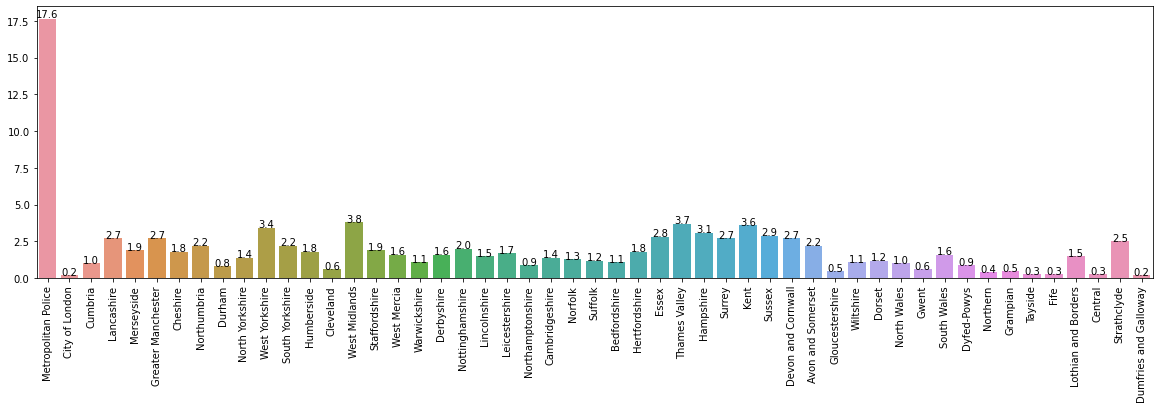

In [ ]:
plotPercentageCol(percent_police_force,degree=90,dim1=20)

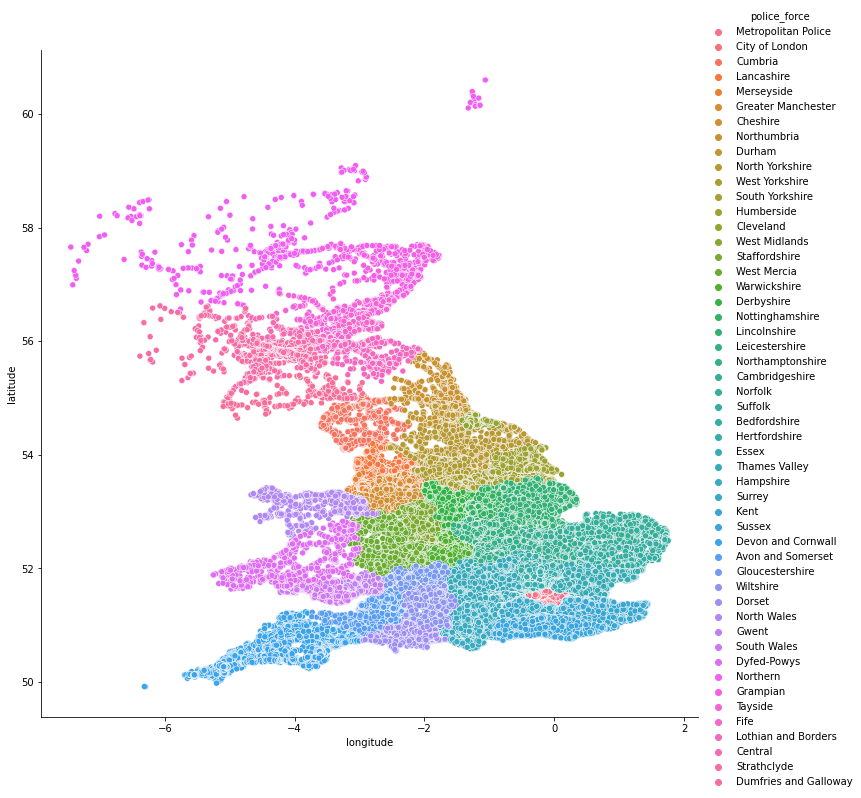

In [ ]:
sns.relplot(
    data=df, x='longitude', y='latitude',
     hue='police_force', height=10
)

###Column 7 accident severity Catogrical feature with no missing




In [ ]:
df.accident_severity

accident_index
201401BS70001     Slight
201401BS70002     Slight
201401BS70003     Slight
201401BS70004     Slight
201401BS70006     Slight
                  ...   
2014984136414    Serious
2014984137514     Slight
2014984137714     Slight
2014984138414    Serious
2014984139614     Slight
Name: accident_severity, Length: 146322, dtype: object

In [ ]:
all_accident_severities = df.accident_severity.unique()
all_accident_severities

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [ ]:
percent_accident_severity = percentOfCategories(df.accident_severity)
percent_accident_severity

{'Slight': 84.8, 'Serious': 14.1, 'Fatal': 1.1}

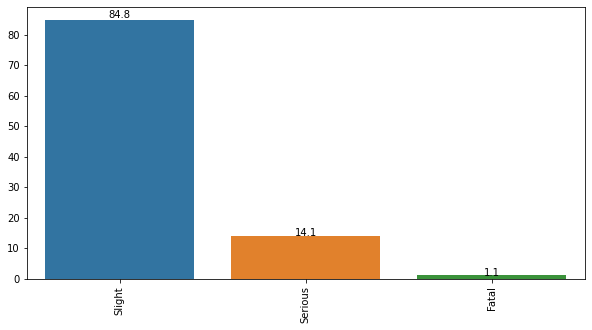

In [ ]:
plotPercentageCol(percent_accident_severity,degree=90)

### Column 8 number_of_vehicles numerical with no missing or nans

In [ ]:
df.number_of_vehicles

accident_index
201401BS70001    2
201401BS70002    2
201401BS70003    2
201401BS70004    1
201401BS70006    2
                ..
2014984136414    2
2014984137514    2
2014984137714    1
2014984138414    3
2014984139614    2
Name: number_of_vehicles, Length: 146322, dtype: int64

In [ ]:
all_number_of_vehicles = df.number_of_vehicles.unique()
all_number_of_vehicles

array([ 2,  1,  3,  4,  6,  5,  7, 10,  9,  8, 11, 13, 19, 21])

In [ ]:
df.number_of_vehicles.describe()

count    146322.000000
mean          1.835179
std           0.700208
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          21.000000
Name: number_of_vehicles, dtype: float64

In [ ]:
percent_number_of_vehicles = percentOfCategories(df.number_of_vehicles,r=3)
percent_number_of_vehicles

{'2': 60.546,
 '1': 29.504,
 '3': 7.743,
 '4': 1.664,
 '6': 0.107,
 '5': 0.364,
 '7': 0.037,
 '10': 0.004,
 '9': 0.005,
 '8': 0.023,
 '11': 0.001,
 '13': 0.001,
 '19': 0.001,
 '21': 0.001}

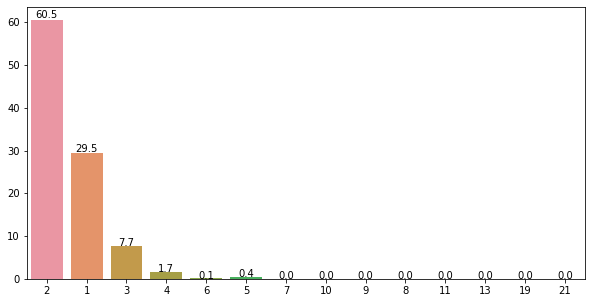

In [ ]:
plotPercentageCol(percent_number_of_vehicles)

### Column 9 number_of_casualties numerical with no nans

In [ ]:
df.number_of_casualties

accident_index
201401BS70001    1
201401BS70002    1
201401BS70003    1
201401BS70004    1
201401BS70006    1
                ..
2014984136414    1
2014984137514    2
2014984137714    1
2014984138414    2
2014984139614    2
Name: number_of_casualties, Length: 146322, dtype: int64

In [ ]:
df.number_of_casualties.unique()

array([ 1,  2,  5,  3,  4,  6,  7, 12,  8, 10,  9, 18, 11, 19, 13, 87, 21,
       20, 17, 41, 16, 93, 15, 14, 27, 54])

In [ ]:
percent_number_of_casualties = percentOfCategories(df.number_of_casualties,r=3)
percent_number_of_casualties

{'1': 78.239,
 '2': 14.944,
 '5': 0.585,
 '3': 4.342,
 '4': 1.534,
 '6': 0.209,
 '7': 0.064,
 '12': 0.003,
 '8': 0.028,
 '10': 0.011,
 '9': 0.02,
 '18': 0.001,
 '11': 0.005,
 '19': 0.001,
 '13': 0.002,
 '87': 0.001,
 '21': 0.001,
 '20': 0.001,
 '17': 0.001,
 '41': 0.001,
 '16': 0.001,
 '93': 0.001,
 '15': 0.001,
 '14': 0.001,
 '27': 0.001,
 '54': 0.001}

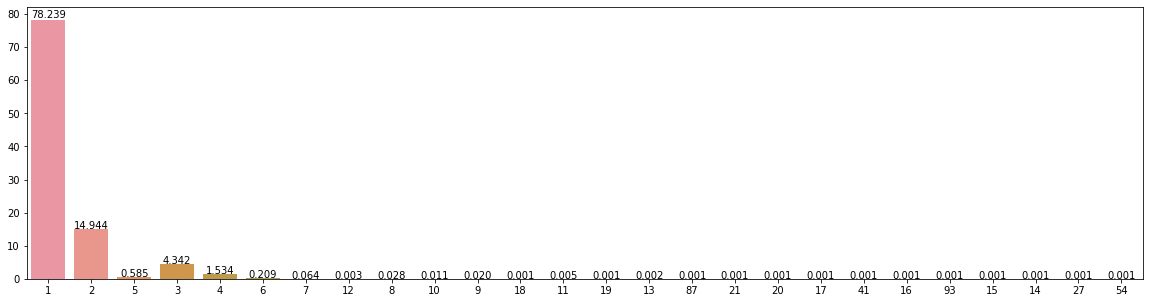

In [ ]:
plotPercentageCol(percent_number_of_casualties,dim1=20,r=3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


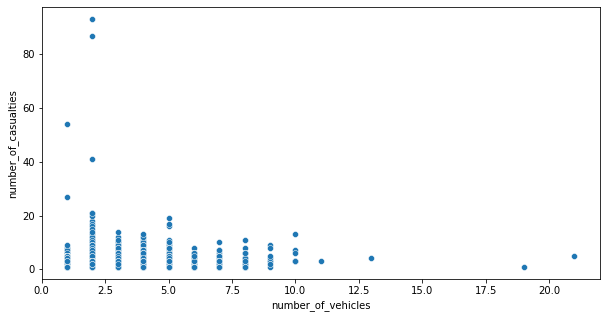

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(df.number_of_vehicles,df.number_of_casualties)
plt.show()

### Column 10 date no missing

In [ ]:
df.date

accident_index
201401BS70001    09/01/2014
201401BS70002    20/01/2014
201401BS70003    21/01/2014
201401BS70004    15/01/2014
201401BS70006    09/01/2014
                    ...    
2014984136414    07/12/2014
2014984137514    11/12/2014
2014984137714    09/12/2014
2014984138414    17/12/2014
2014984139614    24/12/2014
Name: date, Length: 146322, dtype: object

In [ ]:
def getCountOfAccidentPerMonth(x):
  res = {'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0,'11':0,'12':0}
  for date in x :
    month = str(datetime.strptime(date,'%d/%m/%Y').month)
    res[month]=res[month]+1
  return res

In [ ]:
percent_month = percentOfCategories(df.date,r=3,fun=getCountOfAccidentPerMonth)
percent_month

{'1': 8.26,
 '2': 7.367,
 '3': 8.143,
 '4': 7.523,
 '5': 8.408,
 '6': 8.565,
 '7': 8.902,
 '8': 8.275,
 '9': 8.086,
 '10': 9.192,
 '11': 9.053,
 '12': 8.226}

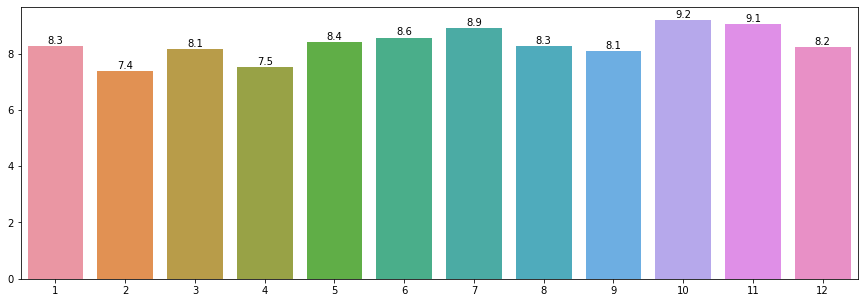

In [ ]:
plotPercentageCol(percent_month,dim1=15,r=1)

###column 11 day_of_week Categorical feature no missing 

In [ ]:
df.day_of_week

accident_index
201401BS70001     Thursday
201401BS70002       Monday
201401BS70003      Tuesday
201401BS70004    Wednesday
201401BS70006     Thursday
                   ...    
2014984136414       Sunday
2014984137514     Thursday
2014984137714      Tuesday
2014984138414    Wednesday
2014984139614    Wednesday
Name: day_of_week, Length: 146322, dtype: object

In [ ]:
def getCountOfAccidentPerDayOfWeek(x):
  res = {'Saturday':0,'Sunday':0,'Monday':0,'Tuesday':0,'Wednesday':0,'Thursday':0,'Friday':0}
  for day in x :
    res[day]=res[day]+1
  return res

In [ ]:
percent_DayOfWeek = percentOfCategories(df.day_of_week,r=3,fun=getCountOfAccidentPerDayOfWeek)
percent_DayOfWeek

{'Saturday': 12.999,
 'Sunday': 10.894,
 'Monday': 14.415,
 'Tuesday': 15.253,
 'Wednesday': 15.179,
 'Thursday': 14.885,
 'Friday': 16.375}

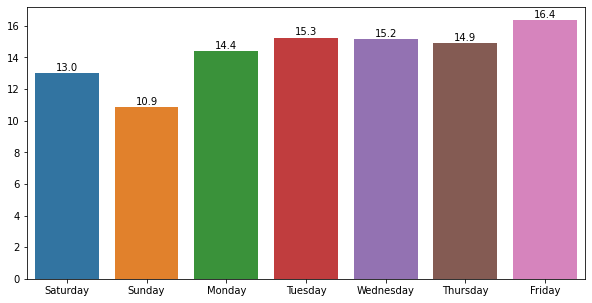

In [ ]:
plotPercentageCol(percent_DayOfWeek,dim1=10,r=1)

### Column 12 time Categorical no missing 

In [ ]:
df.time

accident_index
201401BS70001    13:21
201401BS70002    23:00
201401BS70003    10:40
201401BS70004    17:45
201401BS70006    08:50
                 ...  
2014984136414    22:20
2014984137514    06:40
2014984137714    02:00
2014984138414    06:55
2014984139614    15:00
Name: time, Length: 146322, dtype: object

In [ ]:
def getCountOfAccidentPerHour(x):
  res = {'0':0,'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0,'11':0,'12':0,'13':0,'14':0,'15':0,'16':0,'17':0,'18':0,
         '19':0,'20':0,'21':0,'22':0,'23':0}
  for time in x :
    hour = str(datetime.strptime(time,'%H:%M').hour)
    res[hour]=res[hour]+1
  return res

In [ ]:
percent_hour = percentOfCategories(df.time,r=3,fun=getCountOfAccidentPerHour)
percent_hour

{'0': 1.377,
 '1': 0.983,
 '2': 0.742,
 '3': 0.63,
 '4': 0.554,
 '5': 0.883,
 '6': 1.928,
 '7': 4.604,
 '8': 7.328,
 '9': 5.039,
 '10': 4.649,
 '11': 5.365,
 '12': 6.022,
 '13': 5.957,
 '14': 6.037,
 '15': 7.703,
 '16': 8.149,
 '17': 9.106,
 '18': 7.196,
 '19': 5.135,
 '20': 3.655,
 '21': 2.788,
 '22': 2.365,
 '23': 1.807}

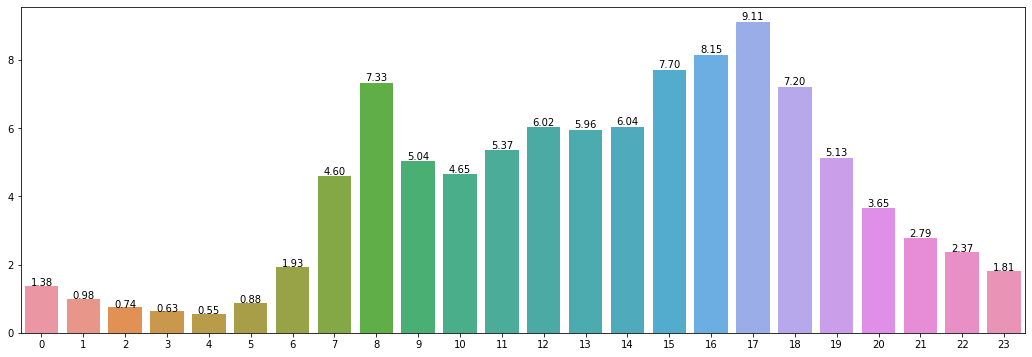

In [ ]:
plotPercentageCol(percent_hour,dim1=18,dim2=6,r=2)

### Column 13 local_authority_district Categorical no missing

In [ ]:
df.local_authority_district

accident_index
201401BS70001    Kensington and Chelsea
201401BS70002    Kensington and Chelsea
201401BS70003    Kensington and Chelsea
201401BS70004    Kensington and Chelsea
201401BS70006    Kensington and Chelsea
                          ...          
2014984136414     Dumfries and Galloway
2014984137514     Dumfries and Galloway
2014984137714     Dumfries and Galloway
2014984138414     Dumfries and Galloway
2014984139614     Dumfries and Galloway
Name: local_authority_district, Length: 146322, dtype: object

### Column 16 first_road_class Categorical feature no missing unclassified roads simply no official class for these roads

In [ ]:
df.first_road_class

accident_index
201401BS70001       A
201401BS70002       A
201401BS70003       A
201401BS70004       C
201401BS70006       A
                 ... 
2014984136414    A(M)
2014984137514    A(M)
2014984137714       B
2014984138414       A
2014984139614       B
Name: first_road_class, Length: 146322, dtype: object

In [ ]:
df.first_road_class.unique()

array(['A', 'C', 'B', 'Unclassified', 'Motorway', 'A(M)'], dtype=object)

In [ ]:
percent_first_road_class = percentOfCategories(df.first_road_class,r=3)
percent_first_road_class

{'A': 46.355,
 'C': 8.863,
 'B': 12.693,
 'Unclassified': 28.24,
 'Motorway': 3.585,
 'A(M)': 0.262}

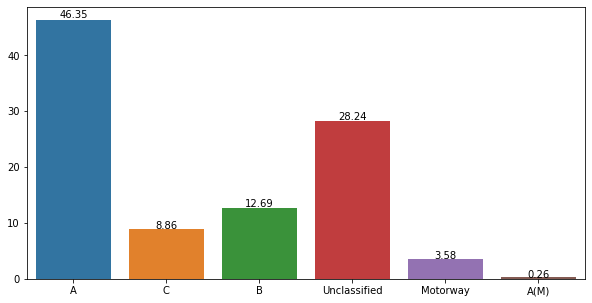

In [ ]:
plotPercentageCol(percent_first_road_class,r=2)

###Column 17 first_road_number no missing or nans Numerical but road with first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero values need to be 0

In [ ]:
df.first_road_number

accident_index
201401BS70001                                                  315
201401BS70002                                                 3218
201401BS70003                                                  308
201401BS70004    first_road_class is C or Unclassified. These r...
201401BS70006                                                    4
                                       ...                        
2014984136414                                                   74
2014984137514                                                   74
2014984137714                                                  721
2014984138414                                                   75
2014984139614                                                  723
Name: first_road_number, Length: 146322, dtype: object

In [ ]:
def countRoadWithoutNumber(x):
  res={}
  for road in x:
    road = str(road)
    if road=='nan':
      if(road in res):
        res[road]=res[road]+1
      else:
        res[road]=1
    try:
      float(road)
    except:
      if(road in res):
        res[road]=res[road]+1
      else:
        res[road]=1
        
  return res

In [ ]:
percent_Missing_first_road_number = percentOfCategories(df.first_road_number,r=3,fun=countRoadWithoutNumber)
percent_Missing_first_road_number

{'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ': 37.104}

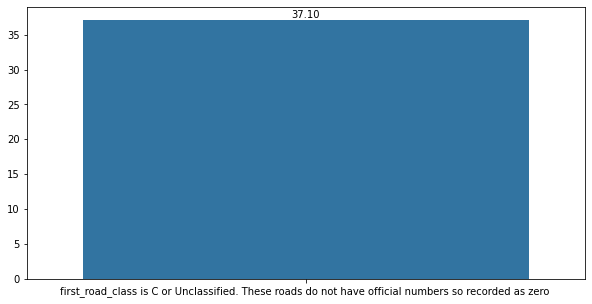

In [ ]:
plotPercentageCol(percent_Missing_first_road_number,r=2)

###Column 18 road_type Categorical with 0.3% nan

In [ ]:
df.road_type

accident_index
201401BS70001    Single carriageway
201401BS70002    Single carriageway
201401BS70003    Single carriageway
201401BS70004    Single carriageway
201401BS70006    Single carriageway
                        ...        
2014984136414      Dual carriageway
2014984137514      Dual carriageway
2014984137714    Single carriageway
2014984138414    Single carriageway
2014984139614    Single carriageway
Name: road_type, Length: 146322, dtype: object

In [ ]:
df.road_type.unique()

array(['Single carriageway', 'One way street', 'Roundabout',
       'Dual carriageway', nan, 'Slip road'], dtype=object)

In [ ]:
percent_road_type = percentOfCategories(df.road_type,r=3)
percent_road_type

{'Single carriageway': 75.304,
 'One way street': 2.006,
 'Roundabout': 7.059,
 'Dual carriageway': 14.231,
 'nan': 0.346,
 'Slip road': 1.054}

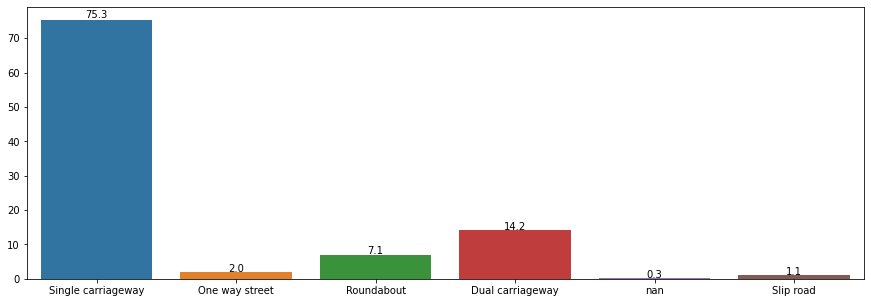

In [ ]:
plotPercentageCol(percent_road_type,dim1=15,r=1)

###Column 19 speed_limit numerical with no missing and no NaNs

In [ ]:
df.speed_limit

accident_index
201401BS70001    30.0
201401BS70002    30.0
201401BS70003    30.0
201401BS70004    30.0
201401BS70006    30.0
                 ... 
2014984136414    70.0
2014984137514    70.0
2014984137714    40.0
2014984138414    60.0
2014984139614    60.0
Name: speed_limit, Length: 146322, dtype: float64

In [ ]:
df.speed_limit.unique()

array([30., 40., 20., 50., 70., 60.])

In [ ]:
percent_speed_limit = percentOfCategories(df.speed_limit,r=3)
percent_speed_limit

{'30.0': 64.923,
 '40.0': 8.213,
 '20.0': 2.336,
 '50.0': 3.962,
 '70.0': 6.887,
 '60.0': 13.679}

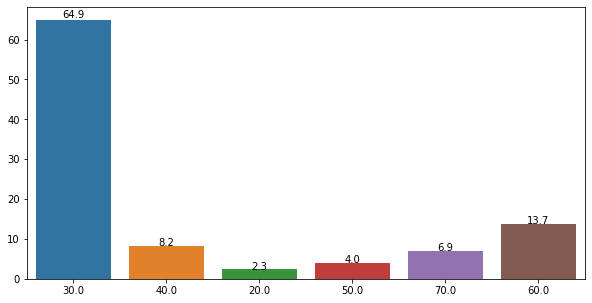

In [ ]:
plotPercentageCol(percent_speed_limit)

###Column 20 junction_detail Categorical with no missing

In [ ]:
df.junction_detail

accident_index
201401BS70001    Not at junction or within 20 metres
201401BS70002                              Slip road
201401BS70003                T or staggered junction
201401BS70004                T or staggered junction
201401BS70006      More than 4 arms (not roundabout)
                                ...                 
2014984136414    Not at junction or within 20 metres
2014984137514    Not at junction or within 20 metres
2014984137714    Not at junction or within 20 metres
2014984138414                T or staggered junction
2014984139614                T or staggered junction
Name: junction_detail, Length: 146322, dtype: object

In [ ]:
df.junction_detail.unique()

array(['Not at junction or within 20 metres', 'Slip road',
       'T or staggered junction', 'More than 4 arms (not roundabout)',
       'Roundabout', 'Crossroads', 'Other junction',
       'Private drive or entrance', 'Mini-roundabout'], dtype=object)

In [ ]:
percent_junction_detail = percentOfCategories(df.junction_detail,r=3)
percent_junction_detail

{'Not at junction or within 20 metres': 38.552,
 'Slip road': 1.42,
 'T or staggered junction': 32.814,
 'More than 4 arms (not roundabout)': 0.695,
 'Roundabout': 9.057,
 'Crossroads': 9.968,
 'Other junction': 2.136,
 'Private drive or entrance': 4.021,
 'Mini-roundabout': 1.337}

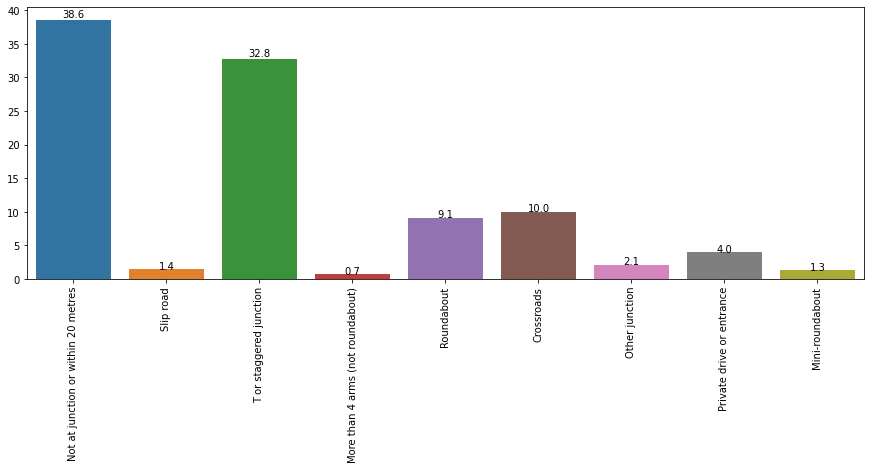

In [ ]:
plotPercentageCol(percent_junction_detail,dim1=15,degree=90)

###Column 21 junction_control Categorical Data missing or out of range 38.6

In [ ]:
df.junction_control

accident_index
201401BS70001    Data missing or out of range
201401BS70002        Give way or uncontrolled
201401BS70003        Give way or uncontrolled
201401BS70004        Give way or uncontrolled
201401BS70006        Give way or uncontrolled
                             ...             
2014984136414    Data missing or out of range
2014984137514    Data missing or out of range
2014984137714    Data missing or out of range
2014984138414        Give way or uncontrolled
2014984139614        Give way or uncontrolled
Name: junction_control, Length: 146322, dtype: object

In [ ]:
df.junction_control.unique()

array(['Data missing or out of range', 'Give way or uncontrolled',
       'Auto traffic signal', 'Authorised person', 'Stop sign'],
      dtype=object)

In [ ]:
percent_junction_control = percentOfCategories(df.junction_control,r=3)
percent_junction_control 

{'Data missing or out of range': 38.591,
 'Give way or uncontrolled': 50.395,
 'Auto traffic signal': 10.438,
 'Authorised person': 0.137,
 'Stop sign': 0.439}

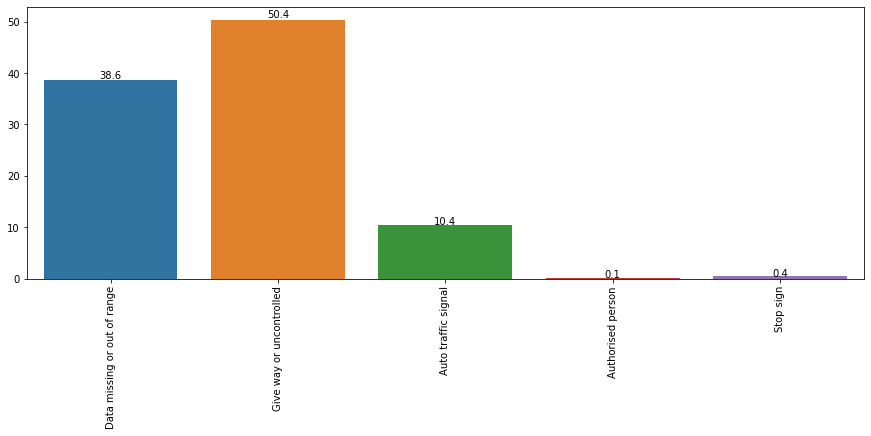

In [ ]:
plotPercentageCol(percent_junction_control ,dim1=15,degree=90)

###Column 22 second_road_class Categorical with 40% roads have -1 not missing but may be no second road 

In [ ]:
df.second_road_class

accident_index
201401BS70001              -1
201401BS70002               A
201401BS70003    Unclassified
201401BS70004    Unclassified
201401BS70006               A
                     ...     
2014984136414              -1
2014984137514              -1
2014984137714              -1
2014984138414               C
2014984139614               B
Name: second_road_class, Length: 146322, dtype: object

In [ ]:
df.second_road_class.unique()

array(['-1', 'A', 'Unclassified', 'C', 'B', 'Motorway', 'A(M)'],
      dtype=object)

In [ ]:
percent_second_road_class = percentOfCategories(df.second_road_class,r=3)
percent_second_road_class

{'-1': 38.954,
 'A': 9.919,
 'Unclassified': 41.586,
 'C': 4.707,
 'B': 4.09,
 'Motorway': 0.677,
 'A(M)': 0.068}

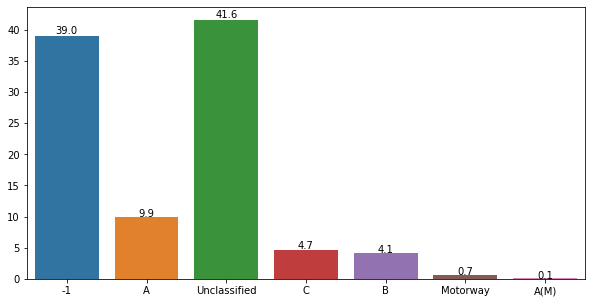

In [ ]:
plotPercentageCol(percent_second_road_class)

###Column 23 second_road_number no missing and 40% nans Numerical but road with first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero values need to be 0

In [ ]:
df.second_road_number

accident_index
201401BS70001                                                  NaN
201401BS70002                                               3220.0
201401BS70003    first_road_class is C or Unclassified. These r...
201401BS70004    first_road_class is C or Unclassified. These r...
201401BS70006                                                  4.0
                                       ...                        
2014984136414                                                  NaN
2014984137514                                                  NaN
2014984137714                                                  NaN
2014984138414    first_road_class is C or Unclassified. These r...
2014984139614                                               7076.0
Name: second_road_number, Length: 146322, dtype: object

In [ ]:
percent_Missing_second_road_number = percentOfCategories(df.second_road_number,r=3,fun=countRoadWithoutNumber)
percent_Missing_second_road_number

{'nan': 38.955,
 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ': 46.292}

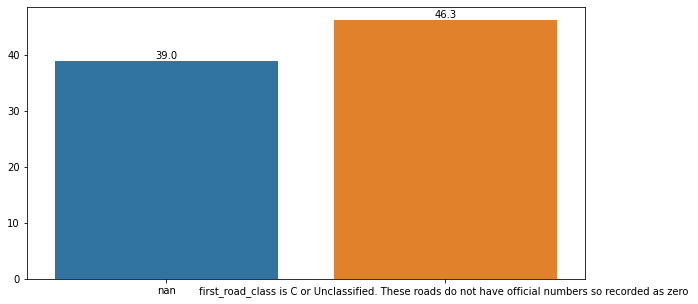

In [ ]:
plotPercentageCol(percent_Missing_second_road_number)

### Column 24 pedestrian_crossing_human_control Categorical feature no missing or nans

In [ ]:
df.pedestrian_crossing_human_control

accident_index
201401BS70001    None within 50 metres 
201401BS70002    None within 50 metres 
201401BS70003    None within 50 metres 
201401BS70004    None within 50 metres 
201401BS70006    None within 50 metres 
                          ...          
2014984136414    None within 50 metres 
2014984137514    None within 50 metres 
2014984137714    None within 50 metres 
2014984138414    None within 50 metres 
2014984139614    None within 50 metres 
Name: pedestrian_crossing_human_control, Length: 146322, dtype: object

In [ ]:
df.pedestrian_crossing_human_control.unique()

array(['None within 50 metres ', 'Control by other authorised person',
       'Control by school crossing patrol'], dtype=object)

In [ ]:
percent_pedestrian_crossing_human_control = percentOfCategories(df.pedestrian_crossing_human_control,r=3)
percent_pedestrian_crossing_human_control

{'None within 50 metres ': 99.464,
 'Control by other authorised person': 0.303,
 'Control by school crossing patrol': 0.233}

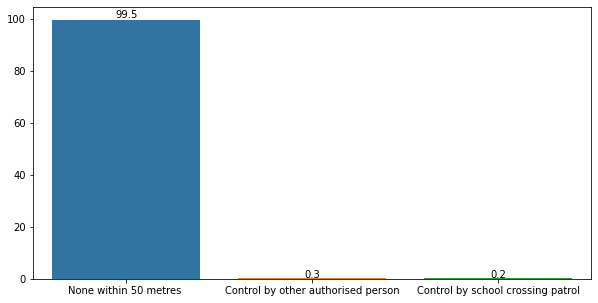

In [ ]:
plotPercentageCol(percent_pedestrian_crossing_human_control)

### Column 25 pedestrian_crossing_physical_facilities Categorical feature no missing or nans

In [ ]:
df.pedestrian_crossing_physical_facilities

accident_index
201401BS70001    No physical crossing facilities within 50 metres
201401BS70002         Pedestrian phase at traffic signal junction
201401BS70003    No physical crossing facilities within 50 metres
201401BS70004                                               Zebra
201401BS70006                                      Central refuge
                                       ...                       
2014984136414    No physical crossing facilities within 50 metres
2014984137514    No physical crossing facilities within 50 metres
2014984137714    No physical crossing facilities within 50 metres
2014984138414    No physical crossing facilities within 50 metres
2014984139614    No physical crossing facilities within 50 metres
Name: pedestrian_crossing_physical_facilities, Length: 146322, dtype: object

In [ ]:
df.pedestrian_crossing_physical_facilities.unique()

array(['No physical crossing facilities within 50 metres',
       'Pedestrian phase at traffic signal junction', 'Zebra',
       'Central refuge',
       'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
       'Footbridge or subway'], dtype=object)

In [ ]:
percent_pedestrian_crossing_physical_facilities = percentOfCategories(df.pedestrian_crossing_physical_facilities,r=3)
percent_pedestrian_crossing_physical_facilities

{'No physical crossing facilities within 50 metres': 80.718,
 'Pedestrian phase at traffic signal junction': 7.739,
 'Zebra': 3.088,
 'Central refuge': 2.287,
 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing': 5.827,
 'Footbridge or subway': 0.341}

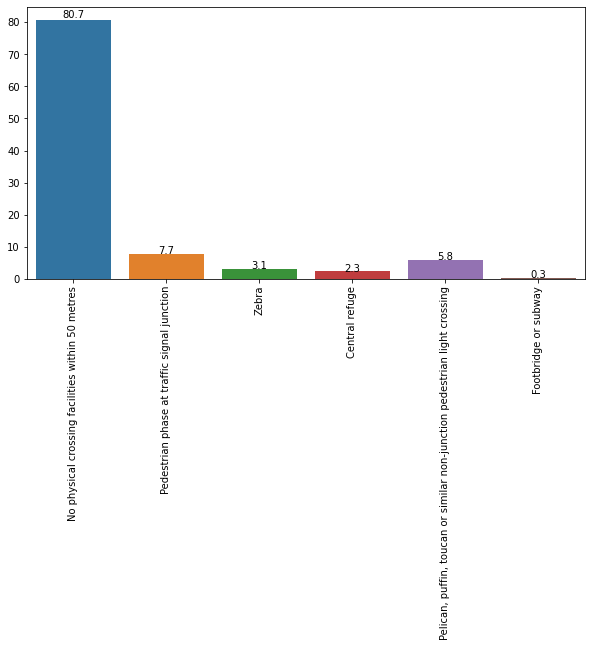

In [ ]:
plotPercentageCol(percent_pedestrian_crossing_physical_facilities,degree=90)

###Column 26 light_conditions Categorical feature without any missing

In [ ]:
df.light_conditions

accident_index
201401BS70001                       Daylight
201401BS70002    Darkness - lighting unknown
201401BS70003                       Daylight
201401BS70004          Darkness - lights lit
201401BS70006                       Daylight
                            ...             
2014984136414         Darkness - no lighting
2014984137514         Darkness - no lighting
2014984137714          Darkness - lights lit
2014984138414         Darkness - no lighting
2014984139614                       Daylight
Name: light_conditions, Length: 146322, dtype: object

In [ ]:
df.light_conditions.unique()

array(['Daylight', 'Darkness - lighting unknown', 'Darkness - lights lit',
       'Darkness - lights unlit', 'Darkness - no lighting'], dtype=object)

In [ ]:
percent_light_conditions = percentOfCategories(df.light_conditions,r=3)
percent_light_conditions

{'Daylight': 73.858,
 'Darkness - lighting unknown': 1.183,
 'Darkness - lights lit': 19.443,
 'Darkness - lights unlit': 0.596,
 'Darkness - no lighting': 4.92}

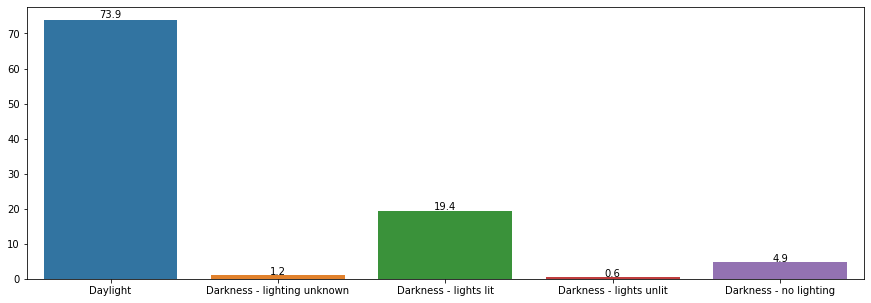

In [ ]:
plotPercentageCol(percent_light_conditions,dim1=15)

###Column 27 Weather Conditions Categorical feature with 1.7 nan

In [ ]:
df.weather_conditions

accident_index
201401BS70001    Raining no high winds
201401BS70002       Fine no high winds
201401BS70003       Fine no high winds
201401BS70004       Fine no high winds
201401BS70006       Fine no high winds
                         ...          
2014984136414    Snowing no high winds
2014984137514       Fine no high winds
2014984137714       Fine no high winds
2014984138414    Raining no high winds
2014984139614       Fine no high winds
Name: weather_conditions, Length: 146322, dtype: object

In [ ]:
df.weather_conditions.unique()

array(['Raining no high winds', 'Fine no high winds',
       'Raining + high winds', nan, 'Other', 'Fine + high winds',
       'Snowing no high winds', 'Fog or mist', 'Snowing + high winds'],
      dtype=object)

In [ ]:
percent_weather_conditions = percentOfCategories(df.weather_conditions,r=3)
percent_weather_conditions

{'Raining no high winds': 12.073,
 'Fine no high winds': 81.245,
 'Raining + high winds': 1.594,
 'nan': 1.695,
 'Other': 1.594,
 'Fine + high winds': 1.076,
 'Snowing no high winds': 0.155,
 'Fog or mist': 0.515,
 'Snowing + high winds': 0.053}

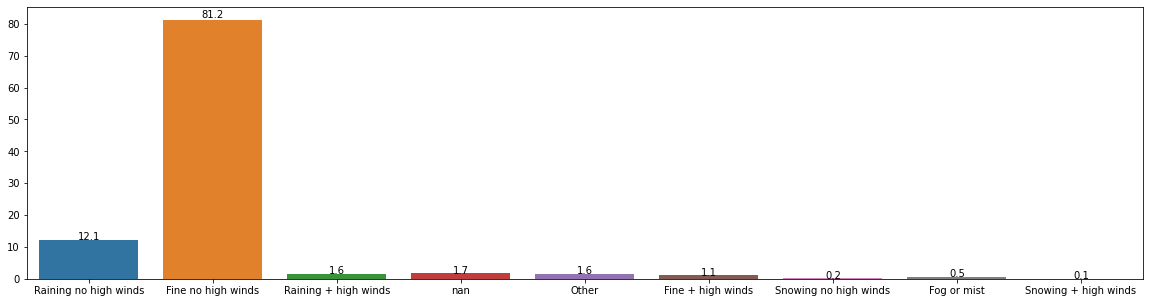

In [ ]:
plotPercentageCol(percent_weather_conditions,dim1=20)

### Column 28 road_surface_conditions Catgorical with 0.15% rows have Data missing or out of range

In [ ]:
df.road_surface_conditions

accident_index
201401BS70001     Wet or damp
201401BS70002             Dry
201401BS70003             Dry
201401BS70004             Dry
201401BS70006             Dry
                     ...     
2014984136414            Snow
2014984137514            Snow
2014984137714    Frost or ice
2014984138414     Wet or damp
2014984139614     Wet or damp
Name: road_surface_conditions, Length: 146322, dtype: object

In [ ]:
df.road_surface_conditions.unique()

array(['Wet or damp', 'Dry', 'Flood over 3cm. deep', 'Frost or ice',
       'Snow', 'Data missing or out of range'], dtype=object)

In [ ]:
percent_road_surface_conditions = percentOfCategories(df.road_surface_conditions,r=3)
percent_road_surface_conditions

{'Wet or damp': 28.65,
 'Dry': 69.722,
 'Flood over 3cm. deep': 0.179,
 'Frost or ice': 1.156,
 'Snow': 0.141,
 'Data missing or out of range': 0.152}

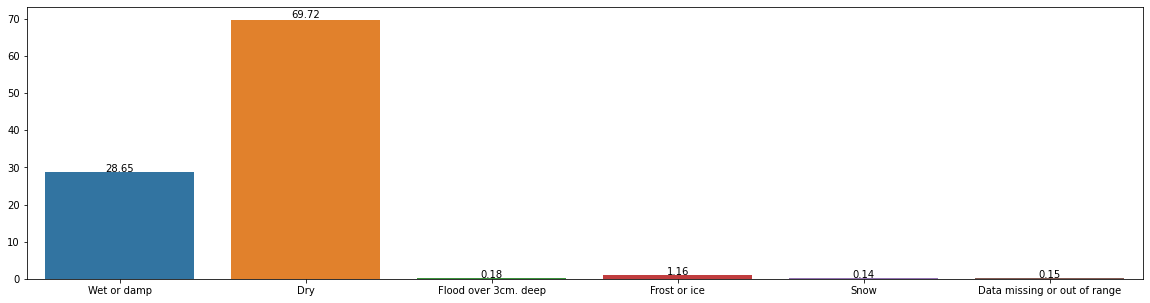

In [ ]:
plotPercentageCol(percent_road_surface_conditions,dim1=20,r=2)

###Column 29 special_conditions_at_site Categorical feature 0.001% missing

In [ ]:
df.special_conditions_at_site

accident_index
201401BS70001    None
201401BS70002    None
201401BS70003    None
201401BS70004    None
201401BS70006    None
                 ... 
2014984136414    None
2014984137514    None
2014984137714    None
2014984138414    None
2014984139614    None
Name: special_conditions_at_site, Length: 146322, dtype: object

In [ ]:
df.special_conditions_at_site.unique()

array(['None', 'Road sign or marking defective or obscured', 'Roadworks',
       'Road surface defective', 'Auto signal part defective',
       'Oil or diesel', 'Auto traffic signal - out', 'Mud',
       'Data missing or out of range'], dtype=object)

In [ ]:
percent_special_conditions_at_site = percentOfCategories(df.special_conditions_at_site,r=3)
percent_special_conditions_at_site

{'None': 97.809,
 'Road sign or marking defective or obscured': 0.141,
 'Roadworks': 1.068,
 'Road surface defective': 0.254,
 'Auto signal part defective': 0.037,
 'Oil or diesel': 0.274,
 'Auto traffic signal - out': 0.15,
 'Mud': 0.267,
 'Data missing or out of range': 0.001}

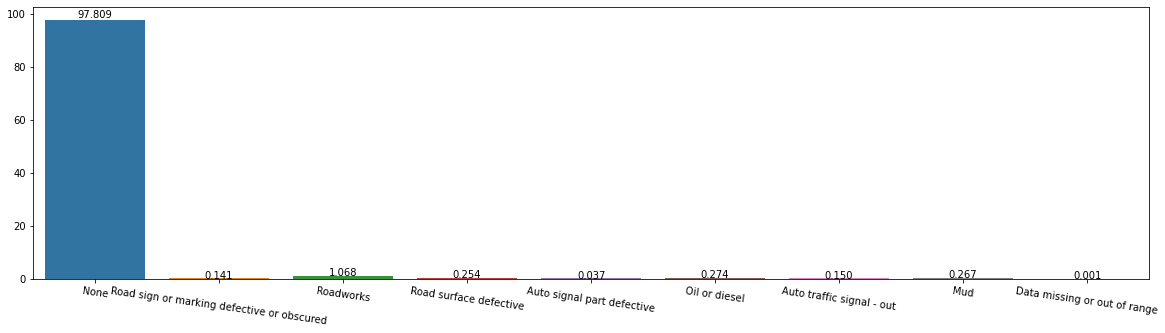

In [ ]:
plotPercentageCol(percent_special_conditions_at_site,dim1=20,r=3,degree=-8)

###Column 30 carriageway_hazards Categorical feature 0.001% missing

In [ ]:
df.carriageway_hazards

accident_index
201401BS70001    None
201401BS70002    None
201401BS70003    None
201401BS70004    None
201401BS70006    None
                 ... 
2014984136414    None
2014984137514    None
2014984137714    None
2014984138414    None
2014984139614    None
Name: carriageway_hazards, Length: 146322, dtype: object

In [ ]:
df.carriageway_hazards.unique()

array(['None', 'Other object on road',
       'Pedestrian in carriageway - not injured', 'Vehicle load on road',
       'Any animal in carriageway (except ridden horse)',
       'Previous accident', 'Data missing or out of range'], dtype=object)

In [ ]:
percent_carriageway_hazards = percentOfCategories(df.carriageway_hazards,r=3)
percent_carriageway_hazards

{'None': 98.351,
 'Other object on road': 0.642,
 'Pedestrian in carriageway - not injured': 0.308,
 'Vehicle load on road': 0.102,
 'Any animal in carriageway (except ridden horse)': 0.473,
 'Previous accident': 0.124,
 'Data missing or out of range': 0.001}

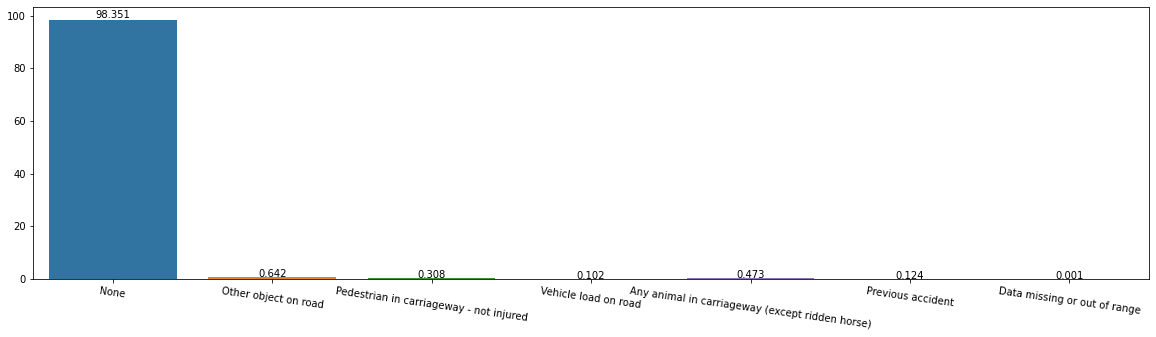

In [ ]:
plotPercentageCol(percent_carriageway_hazards,dim1=20,r=3,degree=-8)

###Column 31 urban or rural Feature without any missing

In [ ]:
df.urban_or_rural_area

accident_index
201401BS70001    Urban
201401BS70002    Urban
201401BS70003    Urban
201401BS70004    Urban
201401BS70006    Urban
                 ...  
2014984136414    Rural
2014984137514    Rural
2014984137714    Rural
2014984138414    Rural
2014984139614    Rural
Name: urban_or_rural_area, Length: 146322, dtype: object

In [ ]:
df.urban_or_rural_area.unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
percent_urban_or_rural_area = percentOfCategories(df.urban_or_rural_area,r=3)
percent_urban_or_rural_area

{'Urban': 65.805, 'Rural': 34.195}

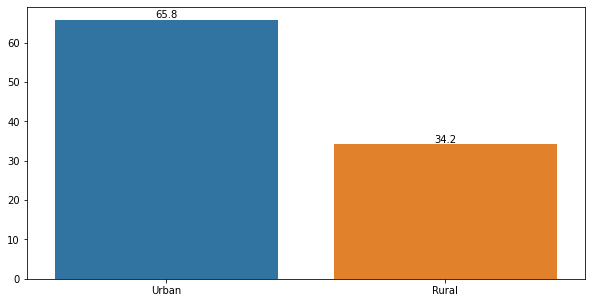

In [ ]:
plotPercentageCol(percent_urban_or_rural_area,r=1)

### Column 32 did_police_officer_attend_scene_of_accident no missing

In [ ]:
df.did_police_officer_attend_scene_of_accident

accident_index
201401BS70001     No
201401BS70002     No
201401BS70003    Yes
201401BS70004     No
201401BS70006    Yes
                ... 
2014984136414    Yes
2014984137514    Yes
2014984137714    Yes
2014984138414    Yes
2014984139614    Yes
Name: did_police_officer_attend_scene_of_accident, Length: 146322, dtype: object

In [ ]:
df.did_police_officer_attend_scene_of_accident.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
percent_did_police_officer_attend_scene_of_accident = percentOfCategories(df.did_police_officer_attend_scene_of_accident,r=3)
percent_did_police_officer_attend_scene_of_accident

{'No': 18.258, 'Yes': 81.742}

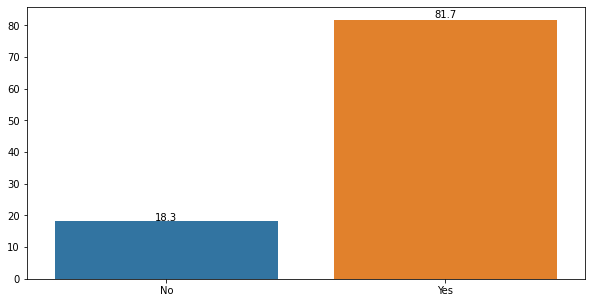

In [ ]:
plotPercentageCol(percent_did_police_officer_attend_scene_of_accident,r=1)

###Column 33 trunk_road_flag 10% missing

In [ ]:
df.trunk_road_flag

accident_index
201401BS70001                       Non-trunk
201401BS70002                       Non-trunk
201401BS70003                       Non-trunk
201401BS70004                       Non-trunk
201401BS70006                       Non-trunk
                             ...             
2014984136414    Data missing or out of range
2014984137514    Data missing or out of range
2014984137714    Data missing or out of range
2014984138414    Data missing or out of range
2014984139614    Data missing or out of range
Name: trunk_road_flag, Length: 146322, dtype: object

In [ ]:
df.trunk_road_flag.unique()

array(['Non-trunk', 'Trunk (Roads managed by Highways England)',
       'Data missing or out of range'], dtype=object)

In [ ]:
percent_trunk_road_flag = percentOfCategories(df.trunk_road_flag,r=3)
percent_trunk_road_flag

{'Non-trunk': 82.741,
 'Trunk (Roads managed by Highways England)': 7.237,
 'Data missing or out of range': 10.022}

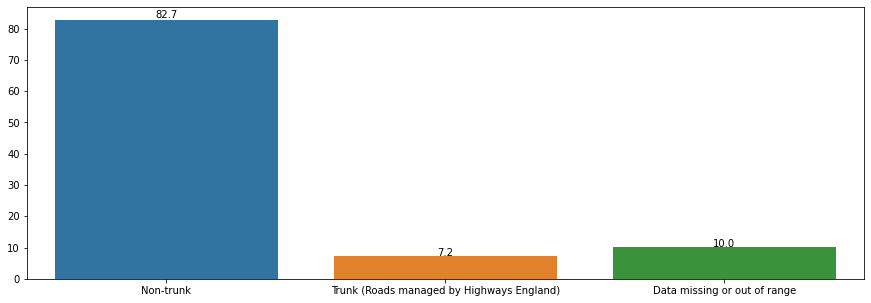

In [ ]:
plotPercentageCol(percent_trunk_road_flag,r=1,dim1=15)

In [ ]:
df.lsoa_of_accident_location

accident_index
201401BS70001    E01002814
201401BS70002    E01002894
201401BS70003    E01002822
201401BS70004    E01002812
201401BS70006    E01002821
                   ...    
2014984136414           -1
2014984137514           -1
2014984137714           -1
2014984138414           -1
2014984139614           -1
Name: lsoa_of_accident_location, Length: 146322, dtype: object

In [ ]:
df.lsoa_of_accident_location.unique()

array(['E01002814', 'E01002894', 'E01002822', ..., 'W01000505',
       'W01000448', 'W01000455'], dtype=object)

#Questions

## Q1 Which Police office reported the most number of Accidents
as shown in the plot Metropolitan Police has the largest number of reported accidents with 17.6%


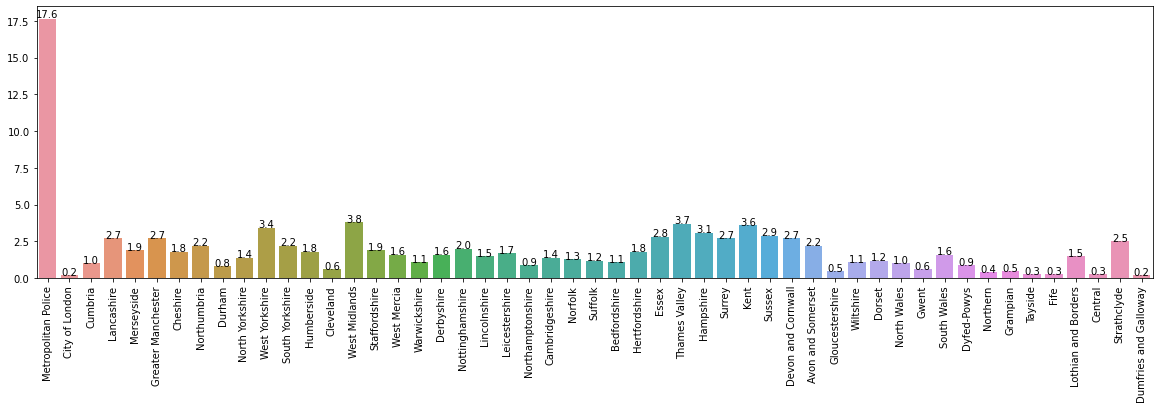

In [ ]:

plotPercentageCol(percentOfCategories(df.police_force),degree=90,dim1=20)

##Q2 Does the accident severity affect the chance that the police attend the scene of the accident

as shown in the plot yes. When the the accidents had less severity the precentage of No(the did not attend) was higher 

In [ ]:
percentOfCategories(df[df.did_police_officer_attend_scene_of_accident =='Yes'].accident_severity,r=3)

{'Slight': 82.989, 'Serious': 15.641, 'Fatal': 1.369}

In [ ]:
percentOfCategories(df[df.did_police_officer_attend_scene_of_accident =='No'].accident_severity,r=3)

{'Slight': 92.667, 'Serious': 7.258, 'Fatal': 0.075}

In [ ]:
percentOfCategories(df[df.accident_severity =='Fatal'].did_police_officer_attend_scene_of_accident,r=3)

{'Yes': 98.794, 'No': 1.206}

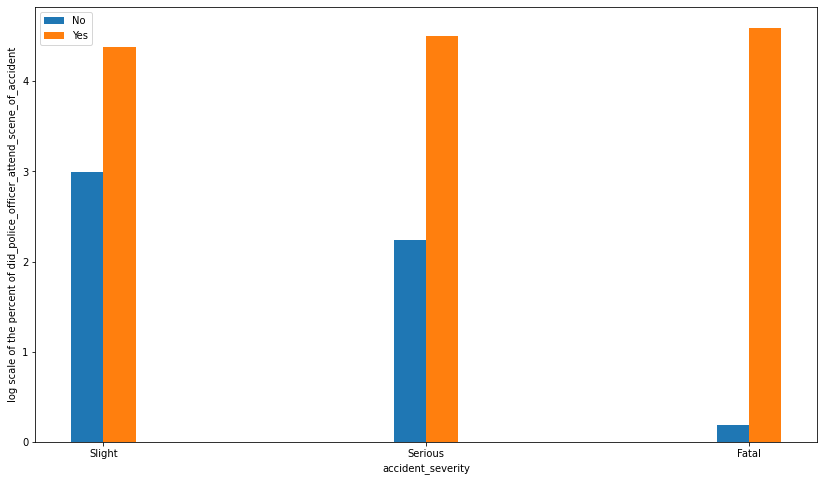

In [ ]:
x,a,b = getDictOfListsOfTwoFeatures(df,'did_police_officer_attend_scene_of_accident','accident_severity',convertArray=False)
x =np.array(convertDictTo2DList(x,b))
plotmultiBars(x,a,b,xlabel="accident_severity",ylabel="log scale of the percent of did_police_officer_attend_scene_of_accident",log=True)

##Q3 when the accident was Fatal in which area urban or rural the chance of police did not attend was higher ?
as shown in the plot in the Urban area the chance was slightly higher.

In [ ]:
percentOfCategories(df[(df.urban_or_rural_area =='Rural') & (df.accident_severity=='Fatal')].did_police_officer_attend_scene_of_accident,r=3)

{'Yes': 99.24, 'No': 0.76}

In [ ]:
percentOfCategories(df[(df.urban_or_rural_area =='Urban') & (df.accident_severity=='Fatal')].did_police_officer_attend_scene_of_accident,r=3)

{'Yes': 98.02, 'No': 1.98}

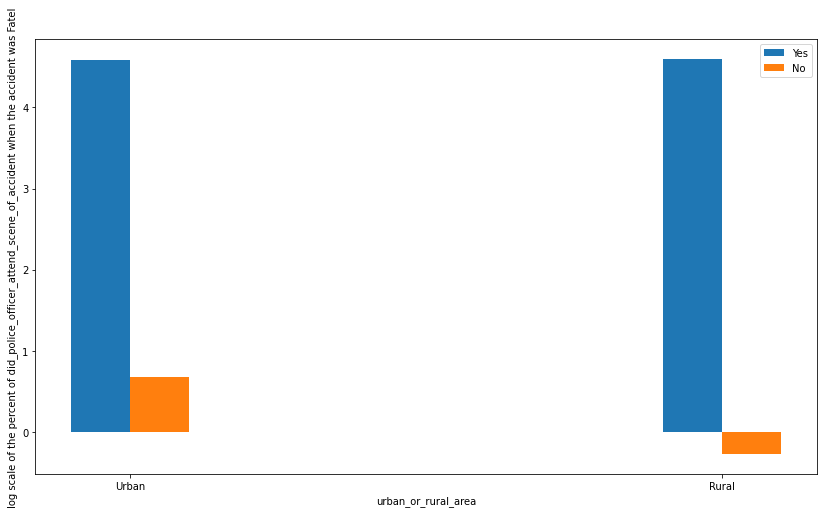

In [ ]:
x,a,b = getDictOfListsOfTwoFeatures(df[df.accident_severity=='Fatal'],'did_police_officer_attend_scene_of_accident','urban_or_rural_area',convertArray=False)
x =np.array(convertDictTo2DList(x,b))
plotmultiBars(x,a,b,log=True,xlabel = 'urban_or_rural_area' , ylabel="log scale of the percent of did_police_officer_attend_scene_of_accident when the accident was Fatel")

##Q4 which area rural or urban had more severe accident 
as shown in rural there were more fatel accidents 

In [ ]:
percentOfCategories(df[df.urban_or_rural_area =='Rural'].accident_severity,r=3)

{'Slight': 80.518, 'Serious': 17.38, 'Fatal': 2.103}

In [ ]:
percentOfCategories(df[df.urban_or_rural_area =='Urban'].accident_severity,r=3)

{'Slight': 86.959, 'Serious': 12.412, 'Fatal': 0.629}

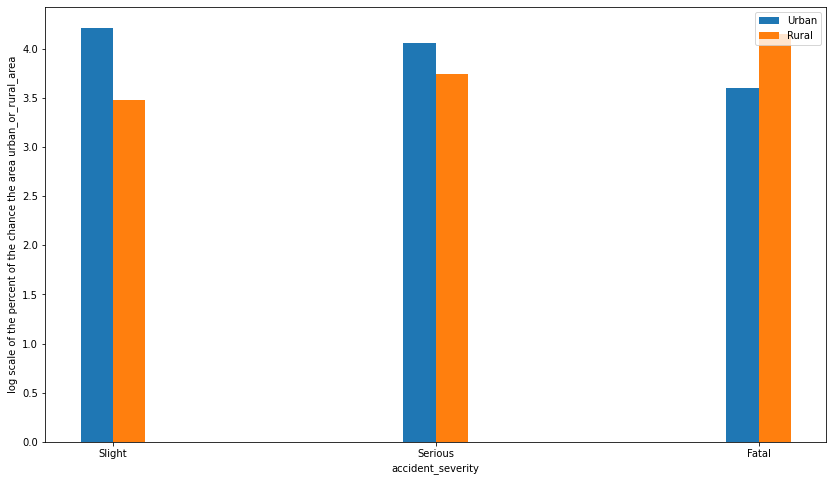

In [ ]:
x,a,b = getDictOfListsOfTwoFeatures(df,'urban_or_rural_area','accident_severity',convertArray=False)
x =np.array(convertDictTo2DList(x,b))
plotmultiBars(x,a,b,log=True,xlabel = 'accident_severity' , ylabel="log scale of the percent of the chance the area urban_or_rural_area")

##Q5 road type caused more accident in rural and urban 
two areas almost the same but rural with less number of slip roads and one way street

In [ ]:
percentOfCategories(df[df.urban_or_rural_area =='Rural'].road_type,r=3)

{'Single carriageway': 69.625,
 'Dual carriageway': 20.242,
 'One way street': 0.38,
 'Roundabout': 7.531,
 'Slip road': 1.869,
 'nan': 0.354}

In [ ]:
percentOfCategories(df[df.urban_or_rural_area =='Urban'].road_type,r=3)

{'Single carriageway': 78.256,
 'One way street': 2.851,
 'Roundabout': 6.814,
 'Dual carriageway': 11.107,
 'nan': 0.342,
 'Slip road': 0.63}

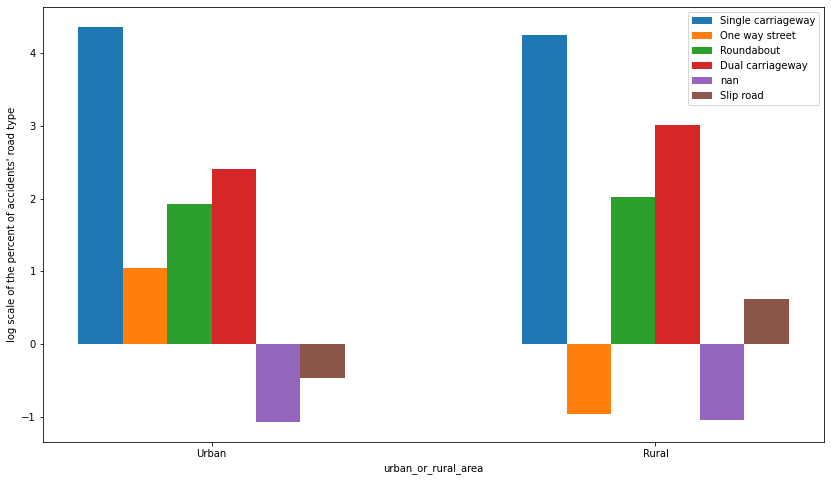

In [ ]:
x,a,b = getDictOfListsOfTwoFeatures(df,'road_type','urban_or_rural_area',convertArray=False)
x =np.array(convertDictTo2DList(x,b))
plotmultiBars(x,a,b,xlabel = 'urban_or_rural_area' , ylabel="log scale of the percent of accidents' road type",log=True)

##Q6 The police force that atteneded the highest percentage of its accidents.
as shown in plot Lancashire attended 100% of reported accidents

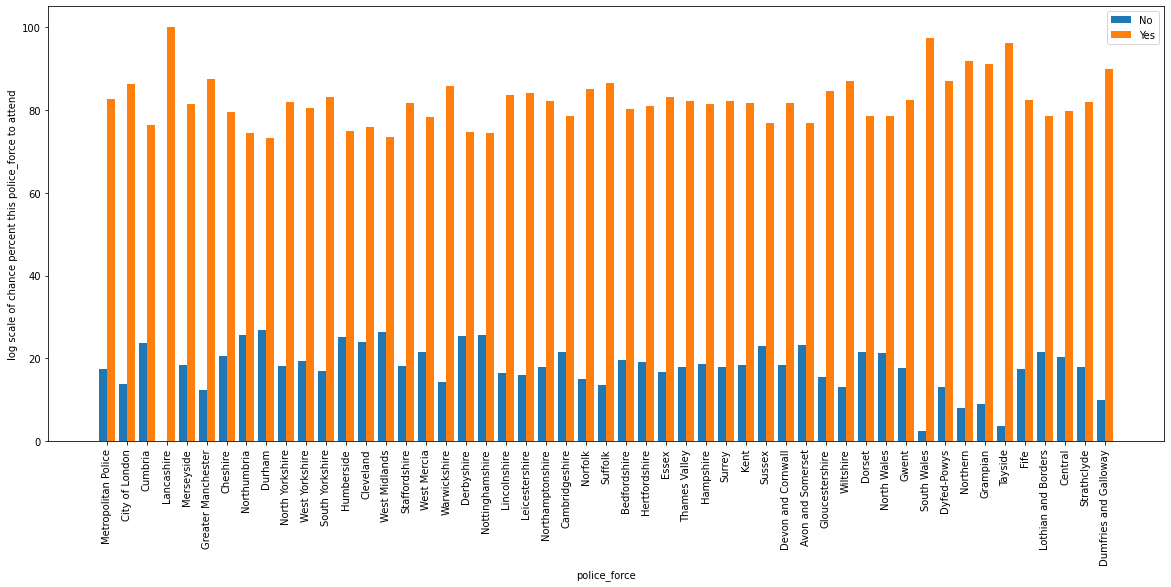

In [ ]:
x,a,b = getDictOfListsOfTwoFeatures(df,'did_police_officer_attend_scene_of_accident','police_force',convertArray=False)
x =np.array(convertDictTo2DList(x,b))
plotmultiBars(x,a,b,xlabel = 'police_force' , ylabel="log scale of chance percent this police_force to attend",width=0.4,dim1=20,degree=90)

##Q7 in which 5 hours of each day most of accidents happened
as shown on Monday, Sunday, Tuesday, and Wednesday their was high chance for accidents in 7 AM but, not in weekend days 

In [ ]:
def days_hour(df,number_of_max):
  days = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
  res =[]
  for day in days:
    all_hours = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
    t =  df[df.day_of_week==day].time
    for time in t :
      hour = datetime.strptime(time,'%H:%M').hour
      all_hours[hour]=all_hours[hour]+1
    all_hours = sorted(all_hours.items(), key=lambda x:x[1], reverse=True)
    all_hours = dict(all_hours)
    res.append(list(all_hours.keys())[:number_of_max])
  b = []
  for i in range(1,number_of_max+1):
    b.append('most_'+str(i))
  return np.array(res),days,b 



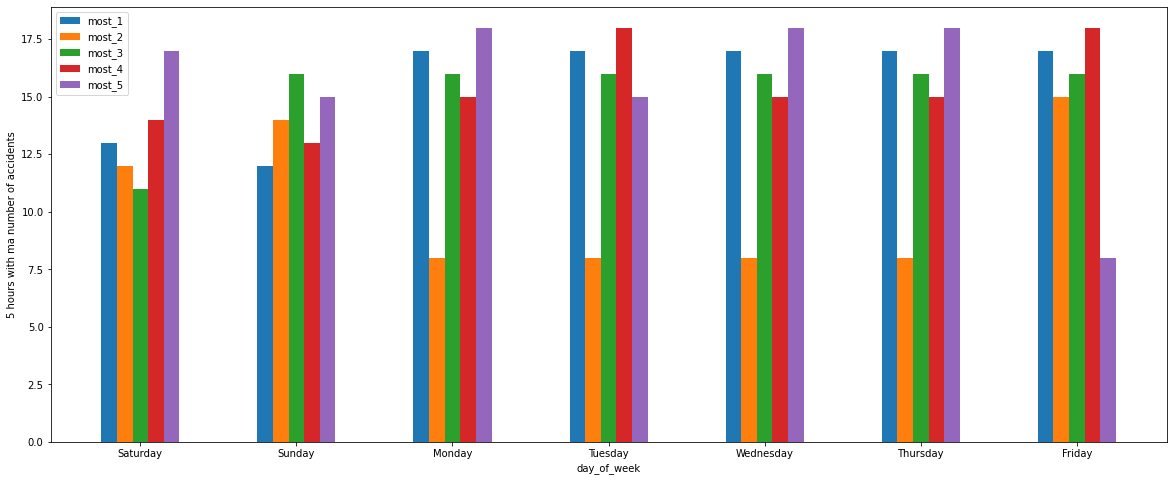

In [ ]:
x,a,b = days_hour(df,5)
plotmultiBars(x,a,b,xlabel = 'day_of_week' , ylabel="5 hours with ma number of accidents",width=0.1,dim1=20)

#Cleaning

In [ ]:
# def nearest(df,x,f1='longitude',f2='latitude',ver = 'local_authority_district',tar ='lsoa_of_accident_location' ,default='-1'):
#   min = 100000000000
#   ISOA = default
#   for i in range(0,len(df)):
#     y = df.iloc[i]
#     d = distance(x[f1],x[f2],y[f1],y[f2])
#     if (d<min) & (x[ver]==y[ver]):
#       min = d
#       ISOA = y[tar]
#   return ISOA
# def distance(x1,y1,x2,y2):
#   return math.sqrt(((x1-x2)**2)+((y1-y2)**2))


In [ ]:
# def LSOAmissing(df):
#   result = df.copy()
#   df_not_missing = df[df.lsoa_of_accident_location!='-1']
#   res = []
#   for i in tqdm(range(0,len(df))):
#     x = df.iloc[i]
#     if x['lsoa_of_accident_location']!='-1':
#       res.append(x['lsoa_of_accident_location'])
#     else:
#       n = nearest(df_not_missing,x)
#       res.append(n)
#   res = np.array(res)
#   result['lsoa_of_accident_location_valid'] = res
#   result.to_csv("'/content/drive/MyDrive/DE Project/2014_Accidents_UK_LSOA.csv'",index=True)


In [ ]:
# LSOAmissing(df)

###All first roads have class label C or Unclassified if and only if these roads do not have road numbers

In [ ]:
all_first_class_c_unclassified = df[df.first_road_class.isin(['C','Unclassified'])].first_road_number

In [ ]:
all_first_class_c_unclassified.unique()

array(['first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero '],
      dtype=object)

In [ ]:
text_of_missing_road_number = 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero '
all_road_without_number = df[df.first_road_number==text_of_missing_road_number].first_road_class
all_road_without_number

accident_index
201401BS70004               C
201401BS70011               C
201401BS70013               C
201401BS70017    Unclassified
201401BS70018               C
                     ...     
2014984122114               C
2014984124914               C
2014984129714               C
2014984131414    Unclassified
2014984133714    Unclassified
Name: first_road_class, Length: 54291, dtype: object

In [ ]:
all_road_without_number.unique()

array(['C', 'Unclassified'], dtype=object)

###NAN Second Road Number

In [ ]:
roadsNumberWithNegativeClass = df[df.second_road_class=='-1'].second_road_number
roadsNumberWithNegativeClass.unique()

array([nan], dtype=object)

all roads with -1 class have nan as a road number

In [ ]:
road_classes_when_roads_with_NaN_number = df[df.second_road_number.isnull()].second_road_class
road_classes_when_roads_with_NaN_number.unique()

array(['-1', 'A', 'B'], dtype=object)

most of roads with nan as road number has -1 class

In [ ]:
percent_road_classes_when_roads_with_NaN_number= percentOfCategories(road_classes_when_roads_with_NaN_number,r=3)
percent_road_classes_when_roads_with_NaN_number

{'-1': 99.996, 'A': 0.002, 'B': 0.002}

####replace all roads with -1 class to have -1 as road number

In [ ]:
no_second_road_then_no_number = '-1'
df.second_road_number= np.where(df.second_road_class == '-1', no_second_road_then_no_number,df.second_road_number)
 
add_to_csv_values('second_road_number','-1','no_second_road_then_no_number')

In [ ]:
percent_Missing_second_road_number_after_filter = percentOfCategories(df.second_road_number,r=3,fun=countRoadWithoutNumber)
percent_Missing_second_road_number_after_filter

{'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ': 46.292,
 'nan': 0.001}

0.001 nan which low percentage so it may be noise 
we will drop them  

In [ ]:
df.dropna(subset = ['second_road_number'], inplace=True)

In [ ]:
has_no_number = '0'
df.second_road_number= np.where(df.second_road_number == 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', has_no_number,df.second_road_number)
df.first_road_number= np.where(df.first_road_number == 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', has_no_number,df.first_road_number)
add_to_csv_values('second_road_number','0','first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ')
add_to_csv_values('first_road_number','0','first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ')

In [ ]:
percent_Missing_second_road_number_after_filter_after_drop = percentOfCategories(df.second_road_number,r=3,fun=countRoadWithoutNumber)
percent_Missing_second_road_number_after_filter_after_drop

{}

### Road type NaN

In [ ]:
road_class_when_road_type_isnull = df[df.road_type.isnull()].first_road_class

In [ ]:
percent_road_class_when_road_type_isnull = percentOfCategories(road_class_when_road_type_isnull,r=3)
percent_road_class_when_road_type_isnull

{'Unclassified': 58.103,
 'B': 9.091,
 'C': 4.941,
 'A': 24.506,
 'Motorway': 2.964,
 'A(M)': 0.395}

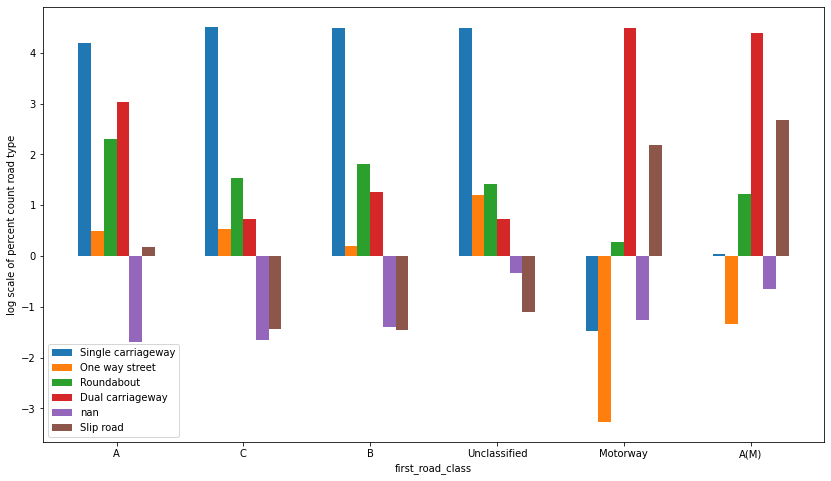

In [ ]:
x,a,b = getDictOfListsOfTwoFeatures(df,'road_type','first_road_class')
x =np.array(convertDictTo2DList(x,b))
plotmultiBars(x,a,b,log=True,xlabel='first_road_class',ylabel='log scale of percent count road type')

nans are distributed among all road types so we can say missing is random and we will drop them since nan represent 0.3%

In [ ]:
df.dropna(subset = ['road_type'], inplace=True)

###weather_conditions NaNs

In [ ]:
percentOfCategories(df[df.weather_conditions.isnull()].police_force,r=3)

{'Metropolitan Police': 23.216,
 'City of London': 0.082,
 'Cumbria': 1.025,
 'Lancashire': 1.354,
 'Merseyside': 1.682,
 'Greater Manchester': 2.666,
 'Cheshire': 1.436,
 'Northumbria': 0.861,
 'Durham': 0.369,
 'North Yorkshire': 0.369,
 'West Yorkshire': 2.461,
 'South Yorkshire': 7.834,
 'Humberside': 0.082,
 'West Midlands': 9.721,
 'Staffordshire': 0.41,
 'West Mercia': 0.082,
 'Derbyshire': 2.543,
 'Nottinghamshire': 3.651,
 'Lincolnshire': 3.322,
 'Leicestershire': 1.6,
 'Northamptonshire': 0.328,
 'Cambridgeshire': 2.748,
 'Norfolk': 0.082,
 'Suffolk': 0.984,
 'Bedfordshire': 0.041,
 'Hertfordshire': 1.682,
 'Essex': 0.697,
 'Thames Valley': 1.395,
 'Hampshire': 0.984,
 'Surrey': 5.578,
 'Kent': 7.957,
 'Sussex': 2.748,
 'Devon and Cornwall': 0.861,
 'Avon and Somerset': 2.297,
 'Gloucestershire': 0.041,
 'Dorset': 0.041,
 'North Wales': 0.738,
 'Gwent': 0.492,
 'South Wales': 0.41,
 'Dyfed-Powys': 0.861,
 'Northern': 0.328,
 'Grampian': 0.451,
 'Fife': 0.164,
 'Lothian and Bo

In [ ]:
percentOfCategories(df[df.weather_conditions.isnull()].accident_severity,r=3)

{'Slight': 88.843, 'Serious': 10.541, 'Fatal': 0.615}

In [ ]:
percentOfCategories(df[df.weather_conditions.isnull()].day_of_week,r=3)

{'Saturday': 14.069,
 'Wednesday': 16.161,
 'Monday': 12.1,
 'Tuesday': 15.751,
 'Thursday': 16.325,
 'Sunday': 10.049,
 'Friday': 15.546}

In [ ]:
percentOfCategories(df[df.weather_conditions.isnull()].first_road_class,r=3)

{'A': 44.34,
 'C': 9.557,
 'Unclassified': 31.501,
 'B': 12.059,
 'Motorway': 2.297,
 'A(M)': 0.246}

In [ ]:
percentOfCategories(df[df.weather_conditions.isnull()].road_type,r=3)

{'Single carriageway': 75.554,
 'Dual carriageway': 12.141,
 'One way street': 2.707,
 'Roundabout': 8.819,
 'Slip road': 0.779}

In [ ]:
percentOfCategories(df[df.weather_conditions.isnull()].light_conditions,r=3)

{'Daylight': 65.299,
 'Darkness - lighting unknown': 12.223,
 'Darkness - lights lit': 18.868,
 'Darkness - lights unlit': 0.533,
 'Darkness - no lighting': 3.076}

In [ ]:
percentOfCategories(df[df.weather_conditions.isnull()].road_surface_conditions,r=3)

{'Dry': 72.97,
 'Wet or damp': 20.139,
 'Frost or ice': 0.902,
 'Data missing or out of range': 5.865,
 'Flood over 3cm. deep': 0.082,
 'Snow': 0.041}

no relation between nans in weather conditions with any features all nans are distributed normally. nans represnts 1.7%
so we will drop nan 

In [ ]:
df.dropna(subset = ['weather_conditions'], inplace=True)

In [ ]:
df.isnull().sum()

accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail     

###Missing in junction_control feature

In [ ]:
Data_missing_or_out_of_range = 'Data missing or out of range'

In [ ]:
percentOfCategories(df[df.junction_control==Data_missing_or_out_of_range].junction_detail,r=3)

{'Not at junction or within 20 metres': 99.89,
 'Other junction': 0.063,
 'Private drive or entrance': 0.033,
 'T or staggered junction': 0.009,
 'Roundabout': 0.004,
 'Slip road': 0.002}

when junction_control is Data_missing_or_out_of_range 99.89% of junction detail is Not at junction or within 20 metres.
replace junction control with missing to Not at junction then no control when junction detail = Not at junction or within 20 metres

In [ ]:
Not_at_junction_then_no_control= 'Not at junction then no control'
Not_at_junction_or_within_20_metres = 'Not at junction or within 20 metres'
df.junction_control= np.where((df.junction_detail == Not_at_junction_or_within_20_metres) & (df.junction_control==Data_missing_or_out_of_range), Not_at_junction_then_no_control,df.junction_control)
add_to_csv_values('junction_control','Not at junction then no control','Not at junction then no control')

In [ ]:
percentOfCategories(df[df.junction_detail==Not_at_junction_or_within_20_metres].junction_control,r=3)

{'Not at junction then no control': 99.991,
 'Give way or uncontrolled': 0.007,
 'Auto traffic signal': 0.002}

drop accidents with junction_detail =Not_at_junction_or_within_20_metres and junction_control!=Not_at_junction_then_no_control.
not a correct situation for having a value for junction_control and there is no junction

In [ ]:
df = df[(df.junction_detail!=Not_at_junction_or_within_20_metres) | (df.junction_control==Not_at_junction_then_no_control)]

In [ ]:
percentOfCategories(df[df.junction_detail==Not_at_junction_or_within_20_metres].junction_control,r=3)

{'Not at junction then no control': 100.0}

only 61 records with missing junction_control.
Drop missing in junction_control

In [ ]:
len(df[df.junction_control==Data_missing_or_out_of_range].junction_detail)

61

In [ ]:
df = df[df.junction_control!=Data_missing_or_out_of_range]

###Missing in road_surface_conditions feature

drop missing in road_surface_conditions column only 0.15% missing so missing is random

In [ ]:
df = df[df.road_surface_conditions!=Data_missing_or_out_of_range]

###Missing in road_surface_conditions feature

drop missing in special_conditions_at_site column only 0.001% missing so missing is random

In [ ]:
df = df[df.special_conditions_at_site!=Data_missing_or_out_of_range]

###Missing in road_surface_conditions feature

drop missing in carriageway_hazards column only 0.001% missing so missing is random

In [ ]:
df = df[df.carriageway_hazards!=Data_missing_or_out_of_range]

###Missing in trunk_road_flag feature

In [ ]:
percentOfCategories(df.trunk_road_flag,r=3)

{'Non-trunk': 82.676,
 'Trunk (Roads managed by Highways England)': 7.282,
 'Data missing or out of range': 10.042}

In [ ]:
percentOfCategories(df[df.trunk_road_flag==Data_missing_or_out_of_range].first_road_class,r=3)

{'B': 14.767,
 'A': 44.601,
 'Unclassified': 34.423,
 'C': 2.378,
 'Motorway': 3.622,
 'A(M)': 0.209}

In [ ]:
percentOfCategories(df[df.trunk_road_flag==Data_missing_or_out_of_range].road_type,r=3)

{'Single carriageway': 76.069,
 'Dual carriageway': 14.496,
 'Slip road': 1.126,
 'Roundabout': 6.306,
 'One way street': 2.002}

In [ ]:
percentOfCategories(df[df.trunk_road_flag==Data_missing_or_out_of_range].junction_detail,r=3)

{'Crossroads': 7.3,
 'Not at junction or within 20 metres': 48.091,
 'T or staggered junction': 24.842,
 'Other junction': 5.263,
 'Mini-roundabout': 0.577,
 'Roundabout': 8.656,
 'Private drive or entrance': 2.545,
 'More than 4 arms (not roundabout)': 0.897,
 'Slip road': 1.829}

In [ ]:
def trunk_road_flag_missing(df,missing='Data missing or out of range',default = 'Non-trunk'):
  res = []
  values = df.trunk_road_flag.unique()
  c = 0
  for i in tqdm(range(0,len(df))):
    x = df.iloc[i]
    if x['trunk_road_flag'] == missing:
      y = df[(df.trunk_road_flag!='Data missing or out of range') &(df.first_road_number==x['first_road_number'])].trunk_road_flag.unique()
      if len(y)>0:
        max = 0
        s = ""
        for v in y:
          z = df[(df.trunk_road_flag==v) &(df.first_road_number==x['first_road_number'])]
          if len(z)>max:
            max = len(z)
            s = v
        if s=="":
          print("balabezo")
        res.append(s)
      else:
        temp = df[df.first_road_class==x['first_road_class']]
        y = temp.trunk_road_flag.unique()
        if len(y)>0:
          max = 0
          s =""
          for v in y:
            z = temp[df.trunk_road_flag==v]
            if len(z)>max:
              max = len(z)
              s = v
          if s=="":
            print("balabezo")
          res.append(s)
        else:
          c+=1
          res.append(default)
    else:
      res.append(x['trunk_road_flag'])
  df['trunk_road_flag'] = res

In [ ]:
trunk_road_flag_missing(df)

100%|██████████| 143234/143234 [22:13<00:00, 107.40it/s]


no correlation between missing and any column. but we can use road number column to restore missing values if row x has missing trunk road flag value we search for accident in the same firt road number and use its trunk road value for road x if no roads with same number as x we use the first road class

In [ ]:

# res = []
# for y in df.first_road_number:
#   res.append(int(y))
# df['first_road_number_num'] =res
# cols_to_be_droped.append('first_road_number')

In [ ]:
# res = []
# for y in df.second_road_number:
#   res.append(int(float(y)))
# df['second_road_number_num'] =res
# cols_to_be_droped.append('second_road_number')

### duplicate columns local_authority_district and local_authority_ons_district 
columns have same values but some areas recoded in diffirent format like St St. Edmundsbury and St Edmundsbury
drop one of them

In [ ]:
df[df['local_authority_district']!=df['local_authority_ons_district']]['local_authority_ons_district'].unique()

array(['Stratford-on-Avon', 'St Edmundsbury', 'St Albans',
       'Isles of Scilly', 'Rhondda Cynon Taf', 'Vale of Glamorgan',
       'Comhairle nan Eilean Siar', 'City of Edinburgh'], dtype=object)

In [ ]:
df[df['local_authority_district']!=df['local_authority_ons_district']]['local_authority_district'].unique()

array(['Stratford-upon-Avon', 'St. Edmundsbury', 'St. Albans', 'Cornwall',
       'Rhondda, Cynon, Taff', 'The Vale of Glamorgan', 'Western Isles',
       'Edinburgh, City of'], dtype=object)

In [ ]:
add_to_col_drop('local_authority_ons_district')

### duplicate columns longitude latitude and location_easting_osgr 	location_northing_osgr 
high correlation between them and each two columns represent location so we can drop two of them

In [ ]:
df[['location_northing_osgr' , 'latitude']].corr()

,location_northing_osgr,latitude
location_northing_osgr,1.000000,0.999972
latitude,0.999972,1.000000


In [ ]:
df[['location_easting_osgr' , 'longitude']].corr()

,location_easting_osgr,longitude
location_easting_osgr,1.000000,0.999389
longitude,0.999389,1.000000


In [ ]:
add_to_col_drop('location_easting_osgr')
add_to_col_drop('location_northing_osgr')

##Ouliers

In [ ]:
def outliersLOF(df,featureX,featureY):
  clf = LocalOutlierFactor()
  X = df[[featureX,featureY]].values
  y_pred = clf.fit_predict(X)
  plt.figure(figsize=(12,12))
  # plot the level sets of the decision function

  in_mask = [True if l == 1 else False for l in y_pred]
  out_mask = [True if l == -1 else False for l in y_pred]

  plt.title("Local Outlier Factor (LOF)")
  # inliers
  a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                  edgecolor = 'k', s = 30)
  # outliers
  b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                  edgecolor = 'k', s = 30)
  plt.axis('tight')
  plt.xlabel(featureX);
  plt.ylabel(featureY);
  plt.show()
  c = 0
  for b in out_mask:
    if b :
      c+=1
  return in_mask,c


In [ ]:
def outliersBox(df,feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  cut_off = IQR * 1.5
  lower = Q1 - cut_off
  upper =  Q3 + cut_off
  in_mask = (df[feature] < upper) & (df[feature] > lower)
  c = 0
  for b in in_mask:
    if not(b) :
      c+=1
  plt.boxplot(df[feature])
  plt.show()
  return in_mask,c

In [ ]:
def outlierZScore(df,feature,th=3):
  z = np.abs(stats.zscore(df[feature]))
  in_mask = z < th*z.std() + z.mean()
  c = 0
  for b in in_mask:
    if not(b) :
      c+=1
  return in_mask,c

  

###outlier number_of_vehicles and number_of_casualties. Box method classified huge number of rows as outliers since it does not take int considtration the relation between features. LOF is the best with 160 recodes as outliers

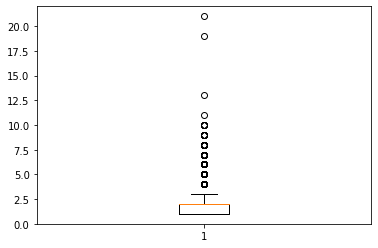

In [ ]:
Box_in_mask_number_of_vehicles,Box_countOutliers_number_of_vehicles = outliersBox(df,'number_of_vehicles')

In [ ]:
Box_countOutliers_number_of_vehicles

3190

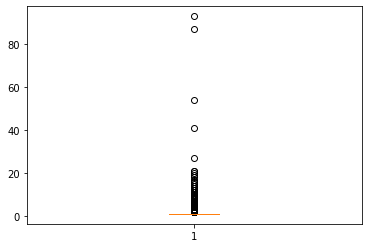

In [ ]:
Box_in_mask_number_of_casualties,Box_countOutliers_number_of_casualties = outliersBox(df,'number_of_casualties')

In [ ]:
Box_countOutliers_number_of_casualties

143234

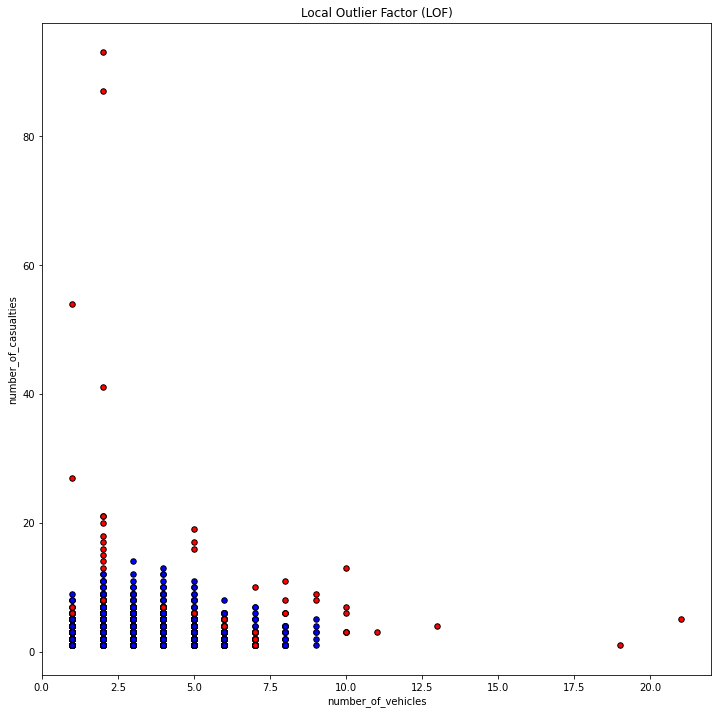

In [ ]:
LOF_in_mask_number_of_vehicles_number_of_casualties,LOF_countOutliers_number_of_vehicles_number_of_casualties = outliersLOF(df,'number_of_vehicles','number_of_casualties')

In [ ]:
LOF_countOutliers_number_of_vehicles_number_of_casualties

160

####drop all outliers from LOF since all of them only 160

In [ ]:
df = df[LOF_in_mask_number_of_vehicles_number_of_casualties]

### location features using Box plot

####longitude

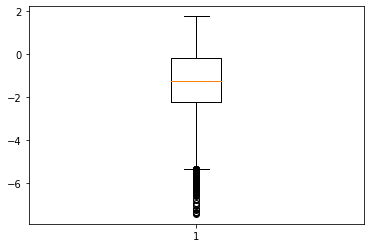

In [ ]:
Box_in_mask_longitude,Box_countOutliers_longitude = outliersBox(df,'longitude')

In [ ]:
Box_countOutliers_longitude

285

In [ ]:
Z_in_mask_longitude,Z_countOutliers_longitude =outlierZScore(df,'longitude',th=3)

In [ ]:
Z_countOutliers_longitude

1252

In [ ]:
Z_in_mask_longitude,Z_countOutliers_longitude =outlierZScore(df,'longitude',th=4)

In [ ]:
Z_countOutliers_longitude

84

drop all outliers (from ZScore method with th = 4) since outliers represent only 0.06%

In [ ]:
df = df[Z_in_mask_longitude]

####latitude

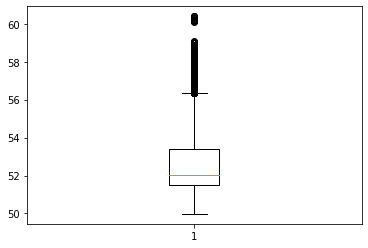

In [ ]:
Box_in_mask_latitude,Box_countOutliers_latitude = outliersBox(df,'latitude')

In [ ]:
Box_countOutliers_latitude

1739

In [ ]:
Z_in_mask_latitude,Z_countOutliers_latitude =outlierZScore(df,'latitude',th=3)

In [ ]:
Z_countOutliers_latitude

2062

In [ ]:
Z_in_mask_latitude,Z_countOutliers_latitude =outlierZScore(df,'latitude',th=5)

In [ ]:
Z_countOutliers_latitude

120

drop all outliers (from ZScore method with th = 4) since outliers represent only 0.1%

In [ ]:
df = df[Box_in_mask_latitude]

same outliers for location_easting_osgr and location_northing_osgr because of the strong correlation between them

###speed_limit

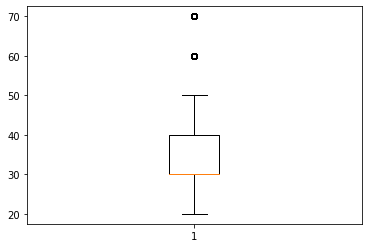

In [ ]:
Box_in_mask_speed_limit,Box_countOutliers_speed_limit = outliersBox(df,'speed_limit')

In [ ]:
Box_countOutliers_speed_limit

28650

In [ ]:
Z_in_mask_speed_limit,Z_countOutliers_speed_limit = outlierZScore(df,'speed_limit')

In [ ]:
Z_countOutliers_speed_limit

0

Box plot method classify all speeds more then 50 as outliers which is not correct.
so Z score more accurate

#Duplicates

In [ ]:
duplicates = df[df.duplicated(subset=['longitude','latitude','date','time'])]
len(duplicates)

5

In [ ]:
df = df.drop_duplicates(subset=['longitude','latitude','date','time'])

any two accidents in the same location and same date and time considered as a dup;icated so we drop 

#Encoding

In [ ]:
def convert_date_time_week(df):
  result = df.copy()
  day=[]
  month=[]
  week=[]
  hour =[]
  minute= []
  for i in range(0,df.shape[0]):
    date_object = datetime.strptime(result['date'][i],'%d/%m/%Y')
    day.append(date_object.day)
    month.append(date_object.month)
    week.append(date_object.isocalendar()[1])
    time_object = datetime.strptime(result['time'][i],'%H:%M')
    hour.append(time_object.hour)
    minute.append(time_object.minute)
  df['day'] = day
  df['month'] = month
  df['week_number'] = week
  df['hour']=hour
  df['minute'] = minute

In [ ]:
convert_date_time_week(df)

In [ ]:
def number_encode_features(df,feature,mapping):
    result = df.copy() # take a copy of the dataframe
    map = []
    for x in df[feature]:
      map.append(mapping[x])
    result[feature+'_encoding'] = np.array(map)
    return result

In [ ]:
def one_hot_encoding(df,feature,drop_col=None,prefix=None):
  result = pd.get_dummies(df[feature])
  if drop_col!=None:
    result = result.drop([drop_col],axis=1)
  if prefix==None:
    prefix = feature
    
  result = result.add_prefix(prefix+'_')
  res = pd.concat([df, result], axis = 1)
  return res


In [ ]:
def calculate_top_categories(df, variable, how_many):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]

def one_hot_encode_frequent(df, variable, how_many):
    result = df.copy()
    top_x_labels = calculate_top_categories(result, variable, how_many)
    for label in top_x_labels:
        result[variable + '_' + label] = np.where(
            result[variable] == label, 1, 0) 
    return result

In [ ]:
def generateLabelsMapping(df,feature):
  x = df[feature].unique()
  map = {}
  n = 0
  for i in x:
    map[i] = n
    n+=1
  return map


In [ ]:
def add_mapping_to_csv(feature,mapping):
  for k in mapping.keys():
    add_to_csv_values(feature+'_encoding',mapping[k],k)


In [ ]:
def add_one_hot_to_csv(df,feature,drop_col=None,prefix=None):
  cols = df[feature].unique()
  if prefix==None:
    prefix = feature

  for x in cols:
    if x!=drop_col:
      add_to_csv_values(prefix+'_'+x,1,x)

  if drop_col!=None:
    add_to_csv_values(prefix+'_'+drop_col,1,'when all '+feature+'columns 0')


In [ ]:
def add_one_hot_freq_to_csv(df, variable, how_many):
    result = df.copy()
    top_x_labels = calculate_top_categories(result, variable, how_many)
    for label in top_x_labels:
      add_to_csv_values(variable + '_' + label,1,label)


###accident_severity label encoding feature is ordinal

In [ ]:
df['accident_severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [ ]:
mapping_accident_severity={'Slight':0, 'Serious':1, 'Fatal':2}
df = number_encode_features(df,'accident_severity',mapping_accident_severity)
add_mapping_to_csv('accident_severity',mapping_accident_severity)
add_to_col_drop('accident_severity')

### day_of_week endcoded with one hot encoding k-1 the feature not ordinal

In [ ]:
df = one_hot_encoding(df,'day_of_week','Friday')

In [ ]:
add_one_hot_to_csv(df,'day_of_week','Friday')
add_to_col_drop('day_of_week')

### first_road_class endcoded with one hot encoding k-1 the feature not ordinal

In [ ]:
df = one_hot_encoding(df,'first_road_class','Unclassified')

In [ ]:
add_one_hot_to_csv(df,'first_road_class','Unclassified')
add_to_col_drop('first_road_class')

### road_type endcoded with one hot encoding k-1 the feature not ordinal

In [ ]:
df = one_hot_encoding(df,'road_type','Slip road')

In [ ]:
add_one_hot_to_csv(df,'road_type','Slip road')
add_to_col_drop('road_type')

###junction_detail endcoded with one hot encoding the most 5 frequent values since the remaining represent small value. the feature not ordinal

In [ ]:
df = one_hot_encode_frequent(df, 'junction_detail', 5)

In [ ]:
add_one_hot_freq_to_csv(df, 'junction_detail', 5)
add_to_col_drop('junction_detail')

###junction_control endcoded with one hot encoding the most 3 frequent values since the remaining represent small value. the feature not ordinal

In [ ]:
df = one_hot_encode_frequent(df, 'junction_control', 3)

In [ ]:
add_one_hot_freq_to_csv(df, 'junction_control', 3)
add_to_col_drop('junction_control')

### second_road_class endcoded with one hot encoding k-1 the feature not ordinal

In [ ]:
df = one_hot_encoding(df,'second_road_class','Unclassified')

In [ ]:
add_one_hot_to_csv(df,'second_road_class','Unclassified')
add_to_col_drop('second_road_class')

###pedestrian_crossing_human_control endcoded with one hot encoding the most frequent value since the remaining represent small value. the feature not ordinal

In [ ]:
df = one_hot_encode_frequent(df,'pedestrian_crossing_human_control',1)

In [ ]:
add_one_hot_freq_to_csv(df, 'pedestrian_crossing_human_control', 1)
add_to_col_drop('pedestrian_crossing_human_control')

###pedestrian_crossing_physical_facilities endcoded with one hot encoding the most 3 frequent values since the remaining represent small value. the feature not ordinal

In [ ]:
df = one_hot_encode_frequent(df,'pedestrian_crossing_physical_facilities',3)

In [ ]:
add_one_hot_freq_to_csv(df, 'pedestrian_crossing_physical_facilities', 3)
add_to_col_drop('pedestrian_crossing_physical_facilities')

###light_conditions label encoding feature is ordinal

In [ ]:
df.light_conditions.unique()

array(['Daylight', 'Darkness - lighting unknown', 'Darkness - lights lit',
       'Darkness - lights unlit', 'Darkness - no lighting'], dtype=object)

In [ ]:
mapping_light_conditions = {'Daylight':0, 'Darkness - lighting unknown':1, 'Darkness - lights lit':2,
       'Darkness - lights unlit':3, 'Darkness - no lighting':4}

In [ ]:
df = number_encode_features(df,'light_conditions',mapping_light_conditions)

In [ ]:
add_mapping_to_csv('light_conditions',mapping_light_conditions)
add_to_col_drop('light_conditions')

###weather_conditions endcoded with one hot encoding the most 2 frequent values since the remaining represent small value. the feature not ordinal

In [ ]:
df = one_hot_encode_frequent(df,'weather_conditions',2)

In [ ]:
add_one_hot_freq_to_csv(df,'weather_conditions',2)
add_to_col_drop('weather_conditions')

###road_surface_conditions endcoded with one hot encoding the most 2 frequent values since the remaining represent small value. the feature not ordinal

In [ ]:
df = one_hot_encode_frequent(df,'road_surface_conditions',2)

In [ ]:
add_one_hot_freq_to_csv(df,'road_surface_conditions',2)
add_to_col_drop('road_surface_conditions')

###special_conditions_at_site endcoded with one hot encoding the most frequent value since the remaining represent small value. the feature not ordinal

In [ ]:
df = one_hot_encode_frequent(df,'special_conditions_at_site',1)

In [ ]:
add_one_hot_freq_to_csv(df,'special_conditions_at_site',1)
add_to_col_drop('special_conditions_at_site')

###carriageway_hazards endcoded with one hot encoding the most frequent value since the remaining represent small value. the feature not ordinal

In [ ]:
df = one_hot_encode_frequent(df,'carriageway_hazards',1)

In [ ]:
add_one_hot_freq_to_csv(df,'carriageway_hazards',1)
add_to_col_drop('carriageway_hazards')

### urban_or_rural_area endcoded with one hot encoding k-1 the feature not ordinal

In [ ]:
df = one_hot_encoding(df,'urban_or_rural_area','Urban')

In [ ]:
add_one_hot_to_csv(df,'urban_or_rural_area','Urban')
add_to_col_drop('urban_or_rural_area')

### did_police_officer_attend_scene_of_accident endcoded with one hot encoding k-1 the feature not ordinal

In [ ]:
df = one_hot_encoding(df,'did_police_officer_attend_scene_of_accident','No')

In [ ]:
add_one_hot_to_csv(df,'did_police_officer_attend_scene_of_accident','No')
add_to_col_drop('did_police_officer_attend_scene_of_accident')

###police_force encoded with label encoding methed the feature not ordinal but it has huge number of unique values so one hot encoding will consume huge memory space. The percentage of unique values almost have no differance so we can not use freqent version of one hot encoding


In [ ]:
df = number_encode_features(df,'police_force',generateLabelsMapping(df,'police_force'))

In [ ]:
add_mapping_to_csv('police_force',generateLabelsMapping(df,'police_force'))
add_to_col_drop('police_force')

### trunck road flag endcoded with one hot encoding k-1 the feature not ordinal it almost binary two values

In [ ]:
df = one_hot_encoding(df,'trunk_road_flag','Non-trunk')

In [ ]:
add_one_hot_to_csv(df,'trunk_road_flag','Non-trunk')
add_to_col_drop('trunk_road_flag')

###local_authority_district, local_authority_highway and lsoa_of_accident_location same as police force

In [ ]:
df = number_encode_features(df,'local_authority_district',generateLabelsMapping(df,'local_authority_district'))

In [ ]:
add_mapping_to_csv('local_authority_district',generateLabelsMapping(df,'local_authority_district'))
add_to_col_drop('local_authority_district')

In [ ]:
df = number_encode_features(df,'local_authority_highway',generateLabelsMapping(df,'local_authority_highway'))

In [ ]:
add_mapping_to_csv('local_authority_highway',generateLabelsMapping(df,'local_authority_highway'))
add_to_col_drop('local_authority_highway')

In [ ]:
# df = number_encode_features(df,'lsoa_of_accident_location',generateLabelsMapping(df,'lsoa_of_accident_location'))

In [ ]:
# add_mapping_to_csv('lsoa_of_accident_location',generateLabelsMapping(df,'lsoa_of_accident_location'))
# add_to_col_drop('lsoa_of_accident_location')

#Discretization

In [ ]:
def parsing_road(x):
  return int(float(x))
def parsing_LSOA(x):
  return int(float(x[2:]))

def intervals(df,feature,number_of_labels,fun = parsing_road):
  x = df[feature].unique()
  y = []
  for a in x:
    y.append(fun(a))
  y.sort()
  step = (len(y)//number_of_labels)+1
  intervals = [y[0]]
  i = step
  while i<len(y):
    intervals.append(y[i])
    i+=step
  if intervals[-1]==y[-1]:
    intervals[-1] = intervals[-1] +1
  else:
    intervals.append(y[-1]+1)
  return intervals

In [ ]:
def discretize(df,feature,intervals,fun= parsing_road,offset=0):
  result = df.copy()
  res = []
  for x in df[feature]:
    x = fun(x)
    for i in range(1,len(intervals)):
      if intervals[i]>x:
        res.append(i-1)
        break
  result[feature+'_encoding'] = np.array(res)
  return result

In [ ]:
def discretizeLSOA(df,number_of_labels,add_csv=True):
  result = df.copy()
  res = []
  intervalsW,intervalsE = intervalsLSOA(result,number_of_labels)
  for i in tqdm(range(0,len(result))):
    x = result.iloc[i]['lsoa_of_accident_location']
    if x=='-1':
      res.append('-1')
      continue
    num = int(x[2:])
    if x[0]=='W':
      f = False
      for i in range(1,len(intervalsW)):
        if intervalsW[i]>num:
          res.append(i-1)
          f = True
          break
      if not(f):
        print(x,'W')

    elif x[0]=='E':
      f = False
      for i in range(0,len(intervalsE)):
        if intervalsE[i]>num:
          res.append(i-1+len(intervalsW))
          f = True
          break
      if not(f):
        print(x,'E')
  if add_csv :
    add_intervals_to_csv('lsoa_of_accident_location_encoding',intervalsW,offset = 0 , prefix="W0")
    add_intervals_to_csv('lsoa_of_accident_location_encoding',intervalsE,offset = len(intervalsW) , prefix="E0")
    add_to_csv_values('lsoa_of_accident_location_encoding','-1','NO LSOA ')
    add_to_col_drop('lsoa_of_accident_location')
  result['lsoa_of_accident_location_encoding'] = np.array(res)
  return result

In [ ]:
def intervalsLSOA(df,number_of_labels):
  w = []
  e = []
  for x in df.lsoa_of_accident_location:
    if x=='-1':
      continue
    num = int(x[2:])
    if (x[0]=='W') &(not(num in w)):
      w.append(num)
    elif (x[0]=='E') &(not(num in e)):
      e.append(num)
    elif (x[0]!='W') & (x[0]!='E'):
      print(w)
  w.sort()
  e.sort()
  intervalsW = getInterval(w,number_of_labels)
  intervalsE = getInterval(e,number_of_labels)
  return intervalsW,intervalsE



In [ ]:
def getInterval(y,number_of_labels):
  step = (len(y)//number_of_labels)+1
  intervals = [y[0]]
  i = step
  while i<len(y):
    intervals.append(y[i])
    i+=step
  if intervals[-1]==y[-1]:
    intervals[-1] = intervals[-1] +1
  else:
    intervals.append(y[-1]+1)
  return intervals


In [ ]:
def add_intervals_to_csv(feature,intervals,offset = 0 , prefix=""):
  for i in range(0,len(intervals)-1):
    add_to_csv_values(feature+'_encoding',str(int(i+offset)),feature+" in intrval ["+prefix+str(intervals[i])+" , "+prefix+str(intervals[i+1])+"[")


###First road and second road can be parsed to integers so can be discretized each interval with label since road numbers have huge number of unique values

In [ ]:
df = discretize(df,'first_road_number',intervals(df,'first_road_number',15))

In [ ]:
df = discretize(df,'second_road_number',intervals(df,'second_road_number',15))

In [ ]:
add_intervals_to_csv('first_road_number',intervals(df,'first_road_number',15))
add_intervals_to_csv('second_road_number',intervals(df,'second_road_number',15))

add_to_col_drop('first_road_number')
add_to_col_drop('second_road_number')

###lsoa_of_accident_location same as road number if we remove first char which 'w' or 'E' we can see the feature as integers and ordinal 
we discretize the feature with label for each interval

In [ ]:
df = discretizeLSOA(df,20)

100%|██████████| 141246/141246 [00:27<00:00, 5144.22it/s]


###week number Discretization

In [ ]:
df = discretize(df,'week_number',intervals(df,'week_number',5))

In [ ]:
add_intervals_to_csv('week_number',intervals(df,'week_number',5))
add_to_col_drop('week_number')

#Features

### 1- sccident in summer or not

In [ ]:
from datetime import date, datetime

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

In [ ]:
accident_in_summer =[]
for date in df.date:
  season = get_season(datetime.strptime(date,'%d/%m/%Y'))
  val = 0
  if season=='summer':
    val = 1
  accident_in_summer.append(val)
df['accident_in_summer'] = np.array(accident_in_summer)
add_to_csv_values('accident_in_summer',1,'accident happend in summer')

###2- accident happend in PM time

In [ ]:
accident_in_PM =[]
for time in df.time:
  hour = datetime.strptime(time,'%H:%M').hour
  val = 0
  if hour>=12:
    val = 1
  accident_in_PM.append(val)
df['accident_in_PM'] = np.array(accident_in_PM)
add_to_csv_values('accident_in_PM',1,'accident happend in PM time')

###3-accident happend on weekend

In [ ]:
accident_on_weekend = []
for day in df.day_of_week:
  val = 0
  if day == 'Saturday' or day=='Sunday':
    val = 1
  accident_on_weekend.append(val)
df['accident_on_weekend'] = np.array(accident_on_weekend)
add_to_csv_values('accident_on_weekend',1,'accident happend on weekend')
  

In [ ]:
add_to_col_drop('date')
add_to_col_drop('time')

#Csv file for lookup

In [ ]:
df = df.drop(cols_drop_csv,axis=1)
np.savetxt(lookup_path, values_csv, delimiter=',', fmt=['"%s"' , '"%s"', '"%s"'], header='column,value,meaning', comments='')

#Normalization

In [ ]:
def minMax(df):
  for column in df.columns:
    if df.dtypes[column] != np.object:
      scaled = MinMaxScaler().fit_transform(df[[column]])
      df[column] = scaled 

In [ ]:
def Box_Cox(df,feature):
  index_of_positive = df[feature] > 0
  positive_rows = df[feature].loc[index_of_positive]
  normalized = stats.boxcox(positive_rows)[0]
  fig, ax=plt.subplots(1,2)
  sns.distplot(positive_rows, ax=ax[0])
  ax[0].set_title("Original Data")
  sns.distplot(normalized, ax=ax[1])
  ax[1].set_title("Normalized data")
  return normalized


In [ ]:
df.describe()

,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit,day,month,hour,minute,accident_severity_encoding,...,police_force_encoding,trunk_road_flag_Trunk (Roads managed by Highways England),local_authority_district_encoding,local_authority_highway_encoding,first_road_number_encoding,second_road_number_encoding,week_number_encoding,accident_in_summer,accident_in_PM,accident_on_weekend
count,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,...,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000,141246.000000
mean,-1.306413,52.440454,1.835648,1.325036,38.176515,15.510506,6.625703,13.514280,27.021516,0.162086,...,18.725529,0.078416,157.859316,90.584809,2.665307,0.791343,2.004007,0.260680,0.658964,0.238301
std,1.383973,1.325813,0.685026,0.746866,13.813652,8.715658,3.433736,5.041496,17.495477,0.397211,...,14.315792,0.268827,111.016545,50.513831,4.819568,2.923285,1.372486,0.439007,0.474059,0.426045
min,-5.654437,49.975186,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.215907,51.472859,1.000000,1.000000,30.000000,8.000000,4.000000,10.000000,12.000000,0.000000,...,5.000000,0.000000,62.000000,46.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-1.218141,52.023533,2.000000,1.000000,30.000000,15.000000,7.000000,14.000000,29.000000,0.000000,...,18.000000,0.000000,137.000000,98.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,-0.165357,53.393919,2.000000,1.000000,40.000000,23.000000,10.000000,17.000000,42.000000,0.000000,...,31.000000,0.000000,257.000000,132.000000,2.000000,0.000000,3.000000,1.000000,1.000000,0.000000
max,1.758797,56.323952,9.000000,14.000000,70.000000,31.000000,12.000000,23.000000,59.000000,2.000000,...,48.000000,1.000000,370.000000,197.000000,14.000000,14.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
len(df)


141246

### longitude

In [ ]:
df.longitude.skew()

-0.46322904642460067

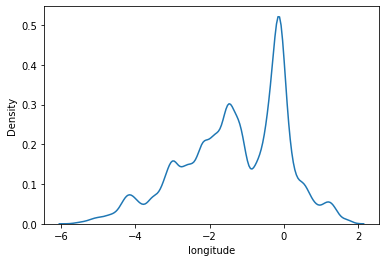

In [ ]:
sns.kdeplot(df.longitude)
plt.show()

-0.467 skewness so the feature considered normally distributed

### latitude

In [ ]:
df.latitude.skew()

0.890442148289321

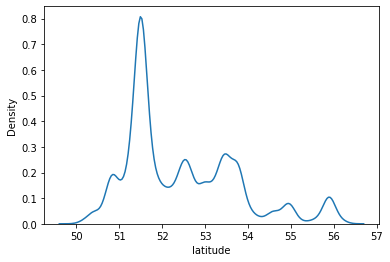

In [ ]:
sns.kdeplot(df.latitude)
plt.show()

0.89 skewness so the feature considered normally distributed

###number_of_vehicles

In [ ]:
df.number_of_vehicles.skew()

1.1798472179508745

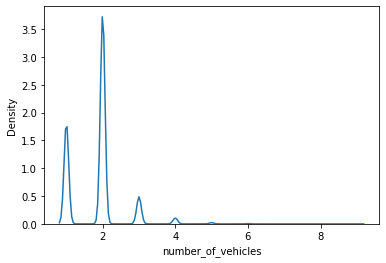

In [ ]:
sns.kdeplot(df.number_of_vehicles)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


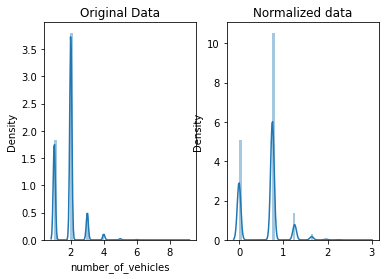

In [ ]:
df['number_of_vehicles'] = Box_Cox(df,'number_of_vehicles')

skewness >1 so it needs to be normlized since it is not normal

### number_of_casualties

In [ ]:
df.number_of_casualties.skew()

3.371201385124412

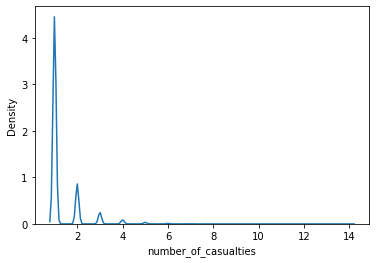

In [ ]:
sns.kdeplot(df.number_of_casualties)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


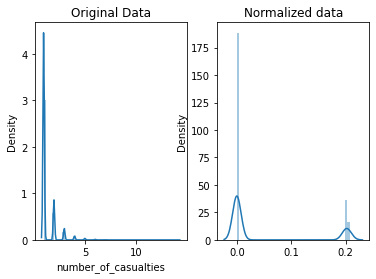

In [ ]:
df['number_of_casualties'] = Box_Cox(df,'number_of_casualties')

skewness >1 so it needs to be normlized since it is not normal

###speed_limit

In [ ]:
df.speed_limit.skew()

1.2123353599361841

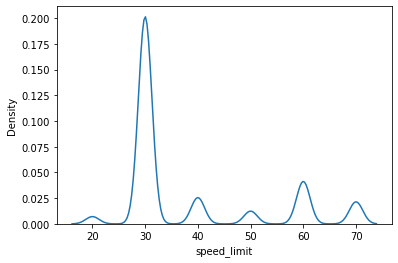

In [ ]:
sns.kdeplot(df.speed_limit)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


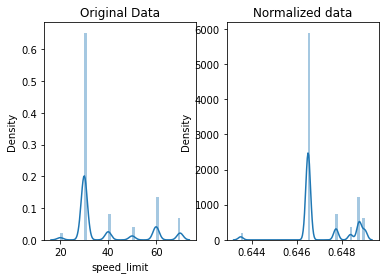

In [ ]:
df['speed_limit'] = Box_Cox(df,'speed_limit')

skewness >1 so it needs to be normlized since it is not normal

##also we can say no need for normalization now since we need to be fully informed about the ML Model that will work this dataset to decide feature have to normal

#Exporting the dataframe to a csv file or parquet

In [ ]:
df.astype(str).to_parquet(output_path_parquet)
df.to_csv(output_path_csv,index=True)